## Exploration 13. QuizAI 💯

<img src='https://towardsml.files.wordpress.com/2019/09/bert.png?w=1200' height='450' width='450'>

### Table of Contents

### 1. Introduction

* 1.1 Pre-training in NLP
* 1.2 Pre-trained Word Embeddings
* 1.3 Pre-trained Language Model

### 2. BERT (Bidirectional Encoder Representations from Transformers)

* 2.1 BERT Outline
* 2.2 BERT Size
* 2.3 BERT Contextual Embedding
* 2.4 BERT Subword Tokenizer : WordPiece, SentencePiece
* 2.5 Position Embedding
* 2.6 BERT Pre-training
* 2.7 Segment Embedding
* 2.8 BERT Fine-tuning
* 2.9 Others
* 2.10 Attention Mask

### 3. Import Libraries

### 4. Load and Preprecess KorQuAD

* 4.1 What is KorQuAD (The Korean Question Answering Dataset)?
* 4.2 Load and Check KorQuAD
* 4.3 Preprocess KorQuAD

### 5. Implementing Various Models

* 5.1 LSTM Model
* 5.2 BERT Model

### 6. Training Models

* 6.1 LSTM
* 6.2 No Pretrained BERT Model
* 6.3 Pretrained BERT Model

### 7. Doing an Inference

* 7.1 Predict Function
* 7.2 No Pretrained Model
* 7.3 Pretrained Model

### 8. Training Progress Visualization and Comparative Analysis

* 8.1 Accuracy and Loss Visualization
* 8.2 Check the Loss

### 9. Retrospection

***

### 1. Introduction

### 1.1 Pre-training in NLP

```
"사전 훈련된 단어 임베딩이 모든 NLP 실무자의 도구 상자에서 사전 훈련된 언어 모델로 대체되는 것은 시간 문제이다."
```
* 2018년 딥 러닝 연구원 세바스찬 루더가 사전 훈련된 언어 모델의 약진을 보며 위와 같은 말을 했다. 
* BERT(Bidirectional Encoder Representations from Transformers)와 같은 트랜스포머 계열의 모델들이 자연어 처리를 지배했던 19년과 20년을 회고하면 이 말은 이미 현실이 된 것이다.

### 1.2 Pre-trained Word Embeddings

* 어떤 태스크를 수행할 때, 임베딩을 사용하는 방법으로는 크게 두 가지가 있다.
  * 임베딩 층(Embedding layer)을 랜덤 초기화하여 처음부터 학습하는 방법
  * 방대한 데이터로 Word2Vec 등과 같은 임베딩 알고리즘으로 사전에 학습된 임베딩 벡터들을 가져와 사용하는 방법
* 만약, 태스크에 사용하기 위한 데이터가 적다면 사전 훈련된 임베딩을 사용하면 성능 향상을 기대해볼 수 있었다.
* 그런데 이 두 가지 방법 모두 하나의 단어가 하나의 벡터값으로 맵핑되므로, 문맥을 고려하지 못 하여 다의어나 동음이의어를 구분하지 못하는 문제점이 있다. 
* 한국어에는 '사과'라는 단어가 존재하는데 이 '사과'는 용서를 빈다는 의미로도 쓰이지만, 먹는 과일의 의미로도 사용된다. 
* 그러나 임베딩 벡터는 '사과'라는 벡터에 하나의 벡터값을 맵핑하므로 이 두 가지 의미를 구분할 수 없었다. 
* 이 한계는 사전 훈련된 언어 모델을 사용하므로서 극복할 수 있었다.

### 1.3 Pre-trained Language Model

### 1.3.1 Semi-Supervised Learning

<img src='https://wikidocs.net/images/page/108730/image1.PNG' height='450' width='450'>

* 2015년 구글은 'Semi-supervised Sequence Learning'라는 논문에서 LSTM 언어 모델을 학습하고나서 이렇게 학습한 LSTM을 텍스트 분류에 추가 학습하는 방법을 보였다. 
* 이 방법은 우선 LSTM 언어 모델을 학습한다. 
* 언어 모델은 주어진 텍스트로부터 이전 단어들로부터 다음 단어를 예측하도록 학습하므로 기본적으로 별도의 레이블이 부착되지 않은 텍스트 데이터로도 학습 가능하다. 
* 사전 훈련된 워드 임베딩과 마찬가지로 사전 훈련된 언어 모델의 강점은 학습 전 사람이 별도 레이블을 지정해줄 필요가 없다는 점이다.  
* 그리고 이렇게 레이블이 없는 데이터로 학습된 LSTM과 가중치가 랜덤으로 초기화 된 LSTM 두 가지를 두고, 텍스트 분류와 같은 문제를 학습하여 사전 훈련된 언어 모델을 사용한 전자의 경우가 더 좋은 성능을 얻을 수 있다는 가능성을 보였다. 
* 방대한 텍스트로 LSTM 언어 모델을 학습해두고, 언어 모델을 다른 태스크에서 높은 성능을 얻기 위해 사용하는 방법으로 ELMo와 같은 아이디어도 존재한다.

### 1.3.2 ELMo (Embeddings from Language Model)

<img src='https://wikidocs.net/images/page/108730/image2.PNG' height='500' width='500'>

* ELMo는 순방향 언어 모델과 역방향 언어 모델을 각각 따로 학습시킨 후에, 이렇게 사전 학습된 언어 모델로부터 임베딩 값을 얻는다는 아이디어였다. 
* 이러한 임베딩은 문맥에 따라서 임베딩 벡터값이 달라지므로, 기존 워드 임베딩인 Word2Vec이나 GloVe 등이 다의어를 구분할 수 없었던 문제점을 해결할 수 있었다. 
* 이어 언어 모델은 RNN 계열의 신경망에서 탈피하기 시작한다. 
* 트랜스포머가 번역기와 같은 인코더-디코더 구조에서 LSTM을 뛰어넘는 좋은 성능을 얻자, LSTM이 아닌 트랜스포머로 사전 훈련된 언어 모델을 학습하는 시도가 등장했다.

### 1.3.3 GPT-1

<img src='https://wikidocs.net/images/page/108730/image3.PNG' height='500' width='500'>

* 위의 그림에서 Trm은 트랜스포머(Transformer)의 약자이다. 
* 트랜스포머의 디코더는 LSTM 언어 모델처럼 순차적으로 이전 단어들로부터 다음 단어를 예측한다. 
* Open AI는 트랜스포머 디코더로 총 12개의 층을 쌓은 후에 방대한 텍스트 데이터를 학습시킨 언어 모델 GPT-1을 만들었다.  
* Open AI는 GPT-1에 여러 다양한 태스크를 위해 추가 학습을 진행하였을 때, 다양한 태스크에서 높은 성능을 얻을 수 있음을 입증했다. 
* NLP의 주요 트렌드는 사전 훈련된 언어 모델을 만들고 이를 특정 태스크에 추가 학습시켜 해당 태스크에서 높은 성능을 얻는 것으로 접어들었고, 언어 모델의 학습 방법에 변화를 주는 모델들이 등장했다. 

### 1.3.4 Masked Language Model

<img src='https://wikidocs.net/images/page/108730/image4.PNG' height='500' width='500'>

* 위의 좌측 그림에 있는 단방향 언어모델은 지금까지 봐왔던 전형적인 언어 모델이다. 
* 시작 토큰 `<SOS>`가 들어가면, 다음 단어 I를 예측하고 그리고 그 다음 단어 am을 예측한다. 
* 반면, 우측에 있는 양방향 언어 모델은 지금까지 본 적 없던 형태의 언어 모델이다. 실제로 이렇게 구현하는 경우는 거의 없다.
* 가령, 양방향 LSTM을 이용해서 우측과 같은 언어 모델을 만들었다고 해보자. 
* 초록색 LSTM 셀은 순방향 언어 모델로 `<SOS>`를 입력받아 I를 예측하고, 그 후에 am을 예측한다. 
* 그런데 am을 예측할 때, 출력층은 주황색 LSTM 셀인 역방향 언어 모델의 정보도 함께 받고있다.
* 그런데 am을 예측하는 시점에서 역방향 언어 모델이 이미 관측한 단어는 a, am, I 이렇게 3개의 단어이다. 
* 이미 예측해야하는 단어를 역방향 언어 모델을 통해 미리 관측한 셈이므로 언어 모델은 일반적으로 양방향으로 구현하지 않는다. 


* 하지만 언어의 문맥이라는 것은 실제로는 양방향이다.  
* 텍스트 분류나 개체명 인식 등에서 양방향 LSTM을 사용하여 모델을 구현해서 좋은 성능을 얻을 수 있었다. 
* 하지만 이전 단어들로부터 다음 단어를 예측하는 언어 모델의 특성으로 인해 위의 그림과 같은 양방향 언어 모델을 사용할 수 없으므로, 
* 그 대안으로 ELMo에서는 순방향과 역방향이라는 두 개의 단방향 언어 모델을 따로 준비하여 학습하는 방법을 사용했던 것이다. 
* 이와 같이 기존 언어 모델로는 양방향 구조를 도입할 수 없으므로, 양방향 구조를 도입하기 위해서 2018년에는 새로운 구조의 언어 모델이 탄생했는데 바로 마스크드 언어 모델이다.


* 마스크드 언어 모델은 입력 텍스트의 단어 집합의 15%의 단어를 랜덤으로 마스킹(Masking)한다. 
* 여기서 마스킹이란 원래의 단어가 무엇이었는지 모르게 한다는 뜻이다. 
* 그리고 인공 신경망에게 이렇게 마스킹 된 단어들을(Masked words) 예측하도록 한다. 문장 중간에 구멍을 뚫어놓고, 구멍에 들어갈 단어들을 예측하게 하는 식이다. 
* 우리가 영어 시험을 볼 때 종종 마주하는 빈칸 채우기 문제에 비유할 수 있다. 
* 예를 들어 '나는 `[MASK]`에 가서 그곳에서 빵과 `[MASK]`를 샀다'를 주고 `[MASK]`에 들어갈 단어를 맞추게 한다.

### 2. BERT (Bidirectional Encoder Representations from Transformers)

<img src='https://ww.namu.la/s/c78d1882e30c0a6c131c20f1bfe3fac5f627b9ac311b157055da636affd5f9ae03be8fe10737d4b31087a4bff5a52bdeff6c4c7aa0b4e4f6a39d925980e5888afba9136fe4593506b23e9e3326582c84' height='150' width='150'>

* BERT(Bidirectional Encoder Representations from Transformers)는 2018년에 구글이 공개한 사전 훈련된 모델이다. 
* BERT라는 이름은 ELMo와 마찬가지로 세서미 스트리트라는 미국 인형극의 캐릭터 이름을 따온 것이기도 하다.
* BERT는 2018년에 공개되어 등장과 동시에 수많은 NLP 태스크에서 최고 성능을 보여주면서 NLP의 한 획을 그은 모델로 평가받고 있다.

### 2.1 BERT Outline

<img src='https://wikidocs.net/images/page/35594/%ED%8C%8C%EC%9D%B8%ED%8A%9C%EB%8B%9D.PNG' height='450' width='450'>

* BERT는 트랜스포머를 이용하여 구현되었으며, 위키피디아(25억 단어)와 BooksCorpus(8억 단어)와 같은 레이블이 없는 텍스트 데이터로 사전 훈련된 언어 모델이다. 
* BERT가 높은 성능을 얻을 수 있었던 것은, 레이블이 없는 방대한 데이터로 사전 훈련된 모델을 가지고, 레이블이 있는 다른 작업(Task)에서 추가 훈련과 함께 하이퍼파라미터를 재조정하여 이 모델을 사용하면 성능이 높게 나오는 기존의 사례들을 참고하였기 때문이다.  
* 다른 작업에 대해서 파라미터 재조정을 위한 추가 훈련 과정을 **파인 튜닝(Fine-tuning)**이라고 한다.


* 위의 그림은 BERT의 파인 튜닝 사례를 보여준다. 
* 우리가 하고 싶은 태스크가 스팸 메일 분류라고 하였을 때, 이미 위키피디아 등으로 사전 학습된 BERT 위에 분류를 위한 신경망을 한 층 추가한다. 
* 이 경우, 비유하자면 BERT가 언어 모델 사전 학습 과정에서 얻은 지식을 활용할 수 있으므로 스팸 메일 분류에서 보다 더 좋은 성능을 얻을 수 있다. 
* ELMo나 OpenAI GPT-1 등이 이러한 파인 튜닝 사례의 대표적인 예이다.

### 2.2 BERT Size

<img src='https://wikidocs.net/images/page/35594/bartbase%EC%99%80large.PNG' height='450' width='450'>

* BERT의 기본 구조는 트랜스포머의 인코더를 쌓아올린 구조이다. 
* Base 버전에서는 총 12개를 쌓았으며, Large 버전에서는 총 24개를 쌓았다. 
* 그 외에도 Large 버전은 Base 버전보다 $\text d_{model}$의 크기나 셀프 어텐션 헤드(Self Attention Heads)의 수가 더 크다. 
* 트랜스포머 인코더 층의 수를 L, $\text d_{model}$의 크기를 D, 셀프 어텐션 헤드의 수를 A라고 하였을 때 각각의 크기는 다음과 같다.
  * BERT-Base : L=12, D=768, A=12 : 110M개의 파라미터
  * BERT-Large : L=24, D=1024, A=16 : 340M개의 파라미터
* 초기 트랜스포머 모델이 L=6, D=512, A=8이었다는 것과 비교하면 Base 또한 초기 트랜스포머보다는 큰 네트워크임을 알 수 있다. 
* 여기서 BERT-base는 BERT보다 앞서 등장한 Open AI GPT-1과 하이퍼파라미터가 동일한데, 이는 BERT 연구진이 직접적으로 GPT-1과 성능을 비교하기 위해서 GPT-1과 동등한 크기로 BERT-Base를 설계하였기 때문이다. 
* 반면, BERT-Large는 BERT의 최대 성능을 보여주기 위해 만들어진 모델이다.  
* BERT가 세운 기록들은 대부분 BERT-Large를 통해 이루어졌다.

### 2.3 BERT Contextual Embedding

* BERT는 ELMo나 GPT-1과 마찬가지로 문맥을 반영한 임베딩(Contextual Embedding)을 사용하고 있다. 

<img src='https://wikidocs.net/images/page/115055/bert0.PNG' height='350' width='350'>

* BERT의 입력은 다른 모델들과 마찬가지로 임베딩 층(Embedding layer)을 지난 임베딩 벡터들이다. 
* $\text d_{model}$을 768로 정의하였으므로, 모든 단어들은 768차원의 임베딩 벡터가 되어 BERT의 입력으로 사용된다.  
* BERT는 내부적인 연산을 거친 후, 동일하게 각 단어에 대해서 768차원의 벡터를 출력한다. 
* 위의 그림에서는 BERT가 각 768차원의 `[CLS]`, I, love, you라는 4개의 벡터를 입력받아서(입력 임베딩) 동일하게 768차원의 4개의 벡터를 출력하는 모습(출력 임베딩)을 보여준다. 

<img src='https://wikidocs.net/images/page/115055/%EA%B7%B8%EB%A6%BC2.PNG' height='600' width='600'>

* BERT의 연산을 거친 후의 출력 임베딩은 문장의 문맥을 모두 참고한 문맥을 반영한 임베딩이 된다. 
* 위의 좌측 그림에서 `[CLS]`라는 벡터는 BERT의 초기 입력으로 사용되었을 입력 임베딩 당시에는 단순히 임베딩 층(embedding layer)를 지난 임베딩 벡터였지만, BERT를 지나고 나서는 `[CLS]`, I, love, you라는 모든 단어 벡터들을 모두 참고한 후에 문맥 정보를 가진 벡터가 된다. 
* 위의 좌측 그림에서는 모든 단어를 참고하고 있다는 것을 점선의 화살표로 표현하였다.
* 이는 `[CLS]`라는 단어 벡터 뿐만 아니라 다른 벡터들도 전부 마찬가지이다. 
* 가령, 우측의 그림에서 출력 임베딩 단계의 love를 보면 BERT의 입력이었던 모든 단어들인 `[CLS]`, I, love, you를 참고하고 있다. 

<img src='https://wikidocs.net/images/page/115055/%EA%B7%B8%EB%A6%BC3.PNG' height='450' width='450'>

* 하나의 단어가 모든 단어를 참고하는 연산은 사실 BERT의 12개의 층에서 전부 이루어지는 연산이다.  
* 그리고 이를 12개의 층을 지난 후에 최종적으로 출력 임베딩을 얻게되는 것이다. 
* 가령, 위의 그림은 BERT의 첫번째 층에 입력된 각 단어가 모든 단어를 참고한 후에 출력되는 과정을 화살표로 표현하였다. 
* BERT의 첫번째 층의 출력 임베딩은 BERT의 두번째 층에서는 입력 임베딩이 된다.

<img src='https://wikidocs.net/images/page/115055/%EA%B7%B8%EB%A6%BC4.PNG' height='550' width='550'>

* BERT는 '셀프 어텐션'을 통해 모든 단어들을 참고하여 문맥을 반영한 출력 임베딩을 얻게 된다. 
* BERT는 기본적으로 트랜스포머 인코더를 12번 쌓은 것이므로 내부적으로 각 층마다 멀티 헤드 셀프 어텐션과 포지션 와이즈 피드 포워드 신경망을 수행하고 있다. 

### 2.4 BERT Subword Tokenizer : WordPiece, SentencePiece

* BERT는 단어보다 더 작은 단위로 쪼개는 서브워드 토크나이저를 사용한다. 
* BERT가 사용한 토크나이저는 WordPiece 토크나이저로 서브워드 토크나이저의 바이트 페어 인코딩(Byte Pair Encoding, BPE)의 유사 알고리즘이다. * 동작 방식은 BPE와 조금 다르지만, 글자로부터 서브워드들을 병합해가는 방식으로 최종 단어 집합(Vocabulary)을 만드는 것은 BPE와 유사하다. 


* 서브워드 토크나이저는 기본적으로 자주 등장하는 단어는 그대로 단어 집합에 추가하지만, 자주 등장하지 않는 단어의 경우에는 더 작은 단위인 서브워드로 분리되어 서브워드들이 단어 집합에 추가된다는 아이디어를 갖고있다. 
* 이렇게 단어 집합이 만들어지고 나면, 이 단어 집합을 기반으로 토큰화를 수행한다. 


* SentencePiece 같은 모델들은 언어마다 다른 문법 규칙을 활용하지 않고, 적절한 Subword 분절 규칙을 학습하거나, 혹은 자주 사용되는 구문을 하나의 단어로 묶어내는 등 통계적인 방법을 사용한다. 
* 그래서 어떤 언어에든 보편적으로 적용 가능하다는 장점이 있다.

### 2.5 Position Embedding

* 트랜스포머에서는 포지셔널 인코딩(Positional Encoding)이라는 방법을 통해서 단어의 위치 정보를 표현했다. 
* 포지셔널 인코딩은 사인 함수와 코사인 함수를 사용하여 위치에 따라 다른 값을 가지는 행렬을 만들어 이를 단어 벡터들과 더하는 방법이다. 
* BERT에서는 이와 유사하지만, 위치 정보를 사인 함수와 코사인 함수로 만드는 것이 아닌 학습을 통해서 얻는 포지션 임베딩(Position Embedding)이라는 방법을 사용한다.

<img src='https://wikidocs.net/images/page/115055/%EA%B7%B8%EB%A6%BC5.PNG' height='450' width='450'>

* 위의 그림은 포지션 임베딩을 사용하는 방법을 보여준다. 
* 우선, 위의 그림에서 WordPiece Embedding은 우리가 이미 알고 있는 단어 임베딩으로 실질적인 입력이다. 
* 그리고 이 입력에 포지션 임베딩을 통해서 위치 정보를 더해주어야 한다. 포지션 임베딩의 아이디어는 굉장히 간단한데, 위치 정보를 위한 임베딩 층(Embedding layer)을 하나 더 사용한다. 
* 가령, 문장의 길이가 4라면 4개의 포지션 임베딩 벡터를 학습시킨다. 
* 그리고 BERT의 입력마다 다음과 같이 포지션 임베딩 벡터를 더해주는 것이다.

  * 첫번째 단어의 임베딩 벡터 + 0번 포지션 임베딩 벡터
  * 두번째 단어의 임베딩 벡터 + 1번 포지션 임베딩 벡터
  * 세번째 단어의 임베딩 벡터 + 2번 포지션 임베딩 벡터
  * 네번째 단어의 임베딩 벡터 + 3번 포지션 임베딩 벡터

* 실제 BERT에서는 문장의 최대 길이를 512로 하고 있으므로, 총 512개의 포지션 임베딩 벡터가 학습된다. 
* 결론적으로 현재 설명한 내용을 기준으로는 BERT에서는 총 두 개의 임베딩 층이 사용된다. 
* 단어 집합의 크기가 30,522개인 단어 벡터를 위한 임베딩 층과 문장의 최대 길이가 512이므로 512개의 포지션 벡터를 위한 임베딩 층이다. 

* 사실 BERT는 세그먼트 임베딩(Segment Embedding)이라는 1개의 임베딩 층을 더 사용한다.

### 2.6 BERT Pre-training

<img src='https://wikidocs.net/images/page/35594/bert-openai-gpt-elmo-%EC%B6%9C%EC%B2%98-bert%EB%85%BC%EB%AC%B8.png' height='650' width='650'>

* 위의 그림은 BERT의 논문에 첨부된 그림으로 ELMo와 GPT-1, 그리고 BERT의 구조적인 차이를 보여준다. 
* 가장 우측 그림의 ELMo는 정방향 LSTM과 역방향 LSTM을 각각 훈련시키는 방식으로 양방향 언어 모델을 만들었다. 
* 가운데 그림의 GPT-1은 트랜스포머의 디코더를 이전 단어들로부터 다음 단어를 예측하는 방식으로 단방향 언어 모델을 만들었다. 
* 단방향(→)으로 설계된 Open AI GPT와 달리 가장 좌측 그림의 BERT는 화살표가 양방향으로 뻗어나가는 모습을 보여준다. 
* 이는 마스크드 언어 모델(Masked Language Model)을 통해 양방향성을 얻었기 때문이다. 
* BERT의 사전 훈련 방법은 크게 두 가지로 나뉜다. 첫 번째는 마스크드 언어 모델이고, 두 번째는 다음 문장 예측(Next sentence prediction, NSP)이다.

### 2.6.1 Masked Language Model (MLM) 🌟

* BERT는 사전 훈련을 위해서 인공 신경망의 입력으로 들어가는 입력 텍스트의 15%의 단어를 랜덤으로 마스킹(Masking)한다. 
* 그리고 인공 신경망에게 이 가려진 단어들을(Masked words) 예측하도록 한다. 
* 중간에 단어들에 구멍을 뚫어놓고, 구멍에 들어갈 단어들을 예측하게 하는 식이다. 
* 예를 들어 '나는 `[MASK]`에 가서 그곳에서 빵과 `[MASK]`를 샀다'를 주고 '슈퍼'와 '우유'를 맞추게 한다. 
* 더 정확히는 전부 `[MASK]`로 변경하지는 않고, 랜덤으로 선택된 15%의 단어들은 다시 다음과 같은 비율로 규칙이 적용된다.
  * 80%의 단어들은 `[MASK]`로 변경한다. → Ex) The man went to the store → The man went to the `[MASK]`
  * 10%의 단어들은 랜덤으로 단어가 변경된다. → Ex) The man went to the store → The man went to the dog
  * 10%의 단어들은 동일하게 둔다. → Ex) The man went to the store → The man went to the store
* 이렇게 하는 이유는 `[MASK]`만 사용할 경우에는 `[MASK]` 토큰이 파인 튜닝 단계에서는 나타나지 않으므로 사전 학습 단계와 파인 튜닝 단계에서의 불일치가 발생하는 문제가 있다. 
* 이 문제을 완화하기 위해서 랜덤으로 선택된 15%의 단어들의 모든 토큰을 `[MASK]`로 사용하지 않는다. 
* 이를 전체 단어 관점에서 그래프를 통해 정리하면 다음과 같다.

<img src='https://wikidocs.net/images/page/115055/%EC%A0%84%EC%B2%B4%EB%8B%A8%EC%96%B4.PNG' height='350' width='350'>

* 전체 단어의 85%는 마스크드 언어 모델의 학습에 사용되지 않는다. 
* 마스크드 언어 모델의 학습에 사용되는 단어는 전체 단어의 15%이다. 
* 학습에 사용되는 12%는 `[MASK]`로 변경 후에 원래 단어를 예측한다. 
* 1.5%는 랜덤으로 단어가 변경된 후에 원래 단어를 예측한다. 
* 1.5%는 단어가 변경되지는 않았지만, BERT는 이 단어가 변경된 단어인지 원래 단어가 맞는지는 알 수 없다. 
* 이 경우에도 BERT는 원래 단어가 무엇인지를 예측하도록 한다.

**[MLM 예시]**

* 'My dog is cute. he likes playing'이라는 문장에 대해서 마스크드 언어 모델을 학습하고자 한다.
* 약간의 전처리와 BERT의 서브워드 토크나이저에 의해 이 문장은 `['my', 'dog', 'is' 'cute', 'he', 'likes', 'play', '##ing']`로 토큰화가 되어 BERT의 입력으로 사용된다. 
* 그리고 언어 모델 학습을 위해서 다음과 같이 데이터가 변경되었다고 가정해보자.

* 'dog' 토큰은 [MASK]로 변경되었다.
<img src='https://wikidocs.net/images/page/115055/%EA%B7%B8%EB%A6%BC8.PNG' height='400' width='400'>

* 위 그림은 'dog' 토큰이 [MASK]로 변경되어서 BERT 모델이 원래 단어를 맞추려고 하는 모습을 보여준다. 
* 여기서 출력층에 있는 다른 위치의 벡터들은 예측과 학습에 사용되지 않고, 오직 'dog' 위치의 출력층의 벡터만이 사용된다. 
* 구체적으로는 BERT의 손실 함수에서 다른 위치에서의 예측은 무시한다. 
* 출력층에서는 예측을 위해 단어 집합의 크기만큼의 밀집층(Dense layer)에 소프트맥스 함수가 사용된 1개의 층을 사용하여 원래 단어가 무엇인지를 맞추게 된다. 
* 그런데 만약 'dog'만 변경된 것이 아니라 다음과 같이 데이터셋이 변경되었다면 어떨까?

* 'dog' 토큰은 [MASK]로 변경되었다. 
* 'he'는 랜덤 단어 'king'으로 변경되었다.
* 'play'는 변경되진 않았지만 예측에 사용된다.
<img src='https://wikidocs.net/images/page/115055/%EA%B7%B8%EB%A6%BC9.PNG' height='400' width='400'>

* BERT는 랜던 담어 'king'으로 변경된 토큰에 대해서도 원래 단어가 무엇인지, 변경되지 않은 단어 'play'에 대해서도 원래 단어가 무엇인지를 예측해야 한다. 
* 'play'는 변경되지 않았지만 BERT 입장에서는 이것이 변경된 단어인지 아닌지 모르므로 마찬가지로 원래 단어를 예측해야 한다. 
* BERT는 마스크드 언어 모델 외에도 다음 문장 예측이라는 또 다른 태스크를 학습한다.

### 2.6.2 Next Sentence Prediction (NSP)

* BERT는 두 개의 문장을 준 후에 이 문장이 이어지는 문장인지 아닌지를 맞추는 방식으로 훈련시킨다. 
* 이를 위해서 50:50 비율로 실제 이어지는 두 개의 문장과 랜덤으로 이어붙인 두 개의 문장을 주고 훈련시킨다. 
* 이를 각각 Sentence A와 Sentence B라고 하였을 때, 다음의 예는 문장의 연속성을 확인한 경우와 그렇지 않은 경우를 보여준다.


  * 이어지는 문장의 경우
    * Sentence A : The man went to the store.
    * Sentence B : He bought a gallon of milk.
    * Label = IsNextSentence
  * 이어지는 문장이 아닌 경우 경우
    * Sentence A : The man went to the store.
    * Sentence B : dogs are so cute.
    * Label = NotNextSentence

<img src='https://wikidocs.net/images/page/115055/%EA%B7%B8%EB%A6%BC10.PNG' height='400' width='400'>

* BERT의 입력으로 넣을 때에는 `[SEP]`라는 특별 토큰을 사용해서 문장을 구분한다. 
* 첫 번째 문장의 끝에 `[SEP]` 토큰을 넣고, 두 번째 문장이 끝나면 역시 `[SEP]` 토큰을 붙여준다. 
* 그리고 이 두 문장이 실제 이어지는 문장인지 아닌지를 `[CLS]` 토큰의 위치의 출력층에서 이진 분류 문제를 풀도록 한다. 
* `[CLS]` 토큰은 BERT가 분류 문제를 풀기 위해 추가된 특별 토큰이다. 
* 그리고 위의 그림에서 나타난 것과 같이 마스크드 언어 모델과 다음 문장 예측은 따로 학습하는 것이 아닌 loss를 합하여 학습이 동시에 이루어진다. 
* BERT가 언어 모델 외에도 다음 문장 예측이라는 태스크를 학습하는 이유는 BERT가 풀고자 하는 태스크 중에서는 QA(Question Answering)나 NLI(Natural Language Inference)와 같이 두 문장의 관계를 이해하는 것이 중요한 태스크들이 있기 때문이다. 

### 2.7 Segment Embedding

<img src='https://wikidocs.net/images/page/115055/%EA%B7%B8%EB%A6%BC7.PNG' height='500' width='500'>

* 앞서 언급했듯이 BERT는 QA 등과 같은 두 개의 문장 입력이 필요한 태스크를 풀기도 한다. 
* 문장 구분을 위해서 BERT는 세그먼트 임베딩이라는 또 다른 임베딩 층(Embedding layer)을 사용한다. 
* 첫번째 문장에는 Sentence 0 임베딩, 두번째 문장에는 Sentence 1 임베딩을 더해주는 방식이며 임베딩 벡터는 두 개만 사용된다.


* 결론적으로 BERT는 총 3개의 임베딩 층이 사용된다. 
  * WordPiece Embedding : 실질적인 입력이 되는 워드 임베딩. 임베딩 벡터의 종류는 단어 집합의 크기로 30,522개.
  * Position Embedding : 위치 정보를 학습하기 위한 임베딩. 임베딩 벡터의 종류는 문장의 최대 길이인 512개.
  * Segment Embedding : 두 개의 문장을 구분하기 위한 임베딩. 임베딩 벡터의 종류는 문장의 최대 개수인 2개.


* 주의할 점은 많은 문헌에서 BERT가 문장 중간의 `[SEP]` 토큰과 두 종류의 세그먼트 임베딩을 통해서 두 개의 문장을 구분하여 입력받을 수 있다고 설명하고 있지만, 여기서 BERT에 두 개의 문장이 들어간다는 표현에서의 문장이라는 것은 실제 우리가 알고 있는 문장의 단위는 아니다. 
* 예를 들어 QA 문제를 푸는 경우에는 `[SEP]`와 세그먼트 임베딩을 기준으로 구분되는 `[질문(Question), 본문(Paragraph)]` 두 종류의 텍스트를 입력받지만, Paragraph 1개는 실제로는 다수의 문장으로 구성될수 있다. 
* 다시 말해 `[SEP]`와 세그먼트 임베딩으로 구분되는 BERT의 입력에서의 두 개의 문장은 실제로는 두 종류의 텍스트, 두 개의 문서일 수 있다.


* BERT가 두 개의 문장을 입력받을 필요가 없는 경우도 있다. 
* 예를 들어 네이버 영화 리뷰 분류나 IMDB 리뷰 분류와 같은 감성 분류 태스크에서는 한 개의 문서에 대해서만 분류를 하는 것이므로, 이 경우에는 BERT의 전체 입력에 Sentence 0 임베딩만을 더해준다.

### 2.8 BERT Fine-tuning

* 사전 학습 된 BERT에 우리가 풀고자 하는 태스크의 데이터를 추가로 학습 시켜서 테스트하는 단계인 파인 튜닝 단계에 대해서 알아보자.
* 실질적으로 태스크에 BERT를 사용하는 단계에 해당된다.

### 2.8.1 Single Text Classification

<img src='https://wikidocs.net/images/page/115055/apply1.PNG' height='300' width='300'>

* BERT를 사용하는 첫번째 유형은 하나의 문서에 대한 텍스트 분류 유형이다. 
* 입력된 문서에 대해서 분류를 하는 유형으로 문서의 시작에 `[CLS]` 라는 토큰을 입력한다. 
* 앞서 사전 훈련 단계에서 다음 문장 예측을 설명할 때, `[CLS]` 토큰은 BERT가 분류 문제를 풀기위한 특별 토큰이라고 언급한 바 있다.  
* 이는 BERT를 실질적으로 사용하는 단계인 파인 튜닝 단계에서도 마찬가지이다. 
* 텍스트 분류 문제를 풀기 위해서 `[CLS]` 토큰의 위치의 출력층에서 밀집층(Dense layer) 또는 같은 이름으로는 완전 연결층(fully-connected layer)이라고 불리는 층들을 추가하여 분류에 대한 예측을 하게된다.

### 2.8.2 Single Text Tagging

<img src='https://wikidocs.net/images/page/115055/apply2.PNG' height='300' width='300'>

* BERT를 사용하는 두번째 유형은 태깅 작업이다. 
* 앞서 RNN 계열의 신경망들을 이용해서 풀었던 태스크이다. 
* 대표적으로 문장의 각 단어에 품사를 태깅하는 품사 태깅 작업과 개체를 태깅하는 개체명 인식 작업이 있다. 
* 출력층에서는 입력 텍스트의 각 토큰의 위치에 밀집층을 사용하여 분류에 대한 예측을 하게 된다.

### 2.8.3 Text Pair Classification or Regression

<img src='https://wikidocs.net/images/page/115055/apply3.PNG' height='400' width='400'>

* BERT는 텍스트의 쌍을 입력으로 받는 태스크도 풀 수 있다. 
* 텍스트의 쌍을 입력으로 받는 대표적인 태스크로 자연어 추론(Natural language inference)이 있다. 
* 자연어 추론 문제란, 두 문장이 주어졌을 때, 하나의 문장이 다른 문장과 논리적으로 어떤 관계에 있는지를 분류하는 것이다. 
* 유형으로는 모순 관계(contradiction), 함의 관계(entailment), 중립 관계(neutral)가 있다.
* 텍스트의 쌍을 입력받는 이러한 태스크의 경우에는 입력 텍스트가 1개가 아니므로, 텍스트 사이에 [SEP] 토큰을 집어넣고, Sentence 0 임베딩과 Sentence 1 임베딩이라는 두 종류의 세그먼트 임베딩을 모두 사용하여 문서를 구분한다.

### 2.8.4 Question Answering

<img src='https://wikidocs.net/images/page/115055/apply4.PNG' height='400' width='400'>

* 텍스트의 쌍을 입력으로 받는 또 다른 태스크로 QA(Question Answering)가 있다. 
* BERT로 QA를 풀기 위해서 질문과 본문이라는 두 개의 텍스트의 쌍을 입력한다. 
* 이 태스크의 대표적인 데이터셋으로 SQuAD(Stanford Question Answering Dataset)이 있다. 
* 이 데이터셋을 푸는 방법은 질문과 본문을 입력받으면, 본문의 일부분을 추출해서 질문에 답변하는 것이다. 
* 예시로 살펴보면 "강우가 떨어지도록 영향을 주는 것은?" 라는 질문이 주어지고, "기상학에서 강우는 대기 수증기가 응결되어 중력의 영향을 받고 떨어지는 것을 의미합니다. 강우의 주요 형태는 이슬비, 비, 진눈깨비, 눈, 싸락눈 및 우박이 있습니다." 라는 본문이 주어졌다고 해보자. 
* 이 경우, 정답은 "중력"이 되어야 한다.

### 2.9 Others

* 훈련 데이터는 위키피디아(25억 단어)와 BooksCorpus(8억 단어) ≈ 33억 단어
* WordPiece 토크나이저로 토큰화를 수행 후 15% 비율에 대해서 마스크드 언어 모델 학습
* 두 문장 Sentence A와 B의 합한 길이. 즉, 최대 입력의 길이는 512로 제한
* 100만 step 훈련 ≈ (총 합 33억 단어 코퍼스에 대해 40 에포크 학습)
* 옵티마이저 : 아담(Adam)
* 학습률(learning rate) : 
* 가중치 감소(Weight Decay) : L2 정규화로 0.01 적용
* 드롭 아웃 : 모든 레이어에 대해서 0.1 적용
* 활성화 함수 : relu 함수가 아닌 gelu 함수
* 배치 크기(Batch size) : 256

### 2.10 Attention Mask

<img src='https://wikidocs.net/images/page/115055/%EA%B7%B8%EB%A6%BC11.PNG' height='400' width='400'>

* BERT를 실제로 실습하게 되면 어텐션 마스크라는 시퀀스 입력이 추가로 필요하다. 
* 어텐션 마스크는 BERT가 어텐션 연산을 할 때, 불필요하게 패딩 토큰에 대해서 어텐션을 하지 않도록 실제 단어와 패딩 토큰을 구분할 수 있도록 알려주는 입력이다. 
* 이 값은 0과 1 두 가지 값을 가지는데, 숫자 1은 해당 토큰은 실제 단어이므로 마스킹을 하지 않는다라는 의미이고, 숫자 0은 해당 토큰은 패딩 토큰이므로 마스킹을 한다는 의미이다. 
* 위의 그림과 같이 실제 단어의 위치에는 1, 패딩 토큰의 위치에는 0의 값을 가지는 시퀀스를 만들어 BERT의 또 다른 입력으로 사용하면 된다.

### 3. Import Libraries

In [1]:
# imports
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow_addons as tfa

import os
import re
import numpy as np
import pandas as pd
import pickle
import random
import collections
import json
from datetime import datetime

import sentencepiece as spm
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

random_seed = 1234
random.seed(random_seed)
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

### 4. Load and Preprecess KorQuAD

### 4.1 What is KorQuAD (The Korean Question Answering Dataset)?

* KorQuAD(The Korean Question Answering Dataset, 한국어 질의응답 데이터셋)은 미국 스탠퍼드 대학에서 구축한 대용량 데이터셋인 SQuAD를 벤치마킹한 것이다. 
* 자연어처리에 입문하게 되면 흔히는 감성분석 등의 Text Classification, 또는 Encoder-Decoder 구조의 모델을 통한 번역 태스크를 많이 다루게 될 것이다. 
* 그러나 자연어처리 분야에서 기계 독해 태스크는 머신이 자연어의 의미를 정확하게 이해하고 사람의 질문에 정확하게 답변할 수 있는지를 측정하는 아주 중요한 분야이다. 
* 그래서 SQuAD 데이터셋은 언어 모델의 성능을 측정하는 가장 표준적인 벤치마크로 인정받고 있다. 
* 두 데이터셋 모두 현재는 2.0으로 버전이 올라가 있다. 
* 1.0과 2.0 모두 EM(Exact Match: 모델이 정답을 정확히 맞춘 비율), F1 score(모델이 낸 답안과 정답이 음절 단위로 겹치는 부분을 고려한 부분 점수), 1-example-latency(질문당 응답속도) 이상 3가지 척도로 모델을 평가한다.
* KorQuAD는 딥러닝 기반 QA(질의응답), 한국어 독해 능력을 측정하는 가장 중요한 태스크로 손꼽히고 있다. 

### 4.2 Load and Check KorQuAD

In [2]:
def print_json_tree(data, indent=""):
    for key, value in data.items():
        if type(value) == list:     # list 형태의 item은 첫번째 item만 출력
            print(f'{indent}- {key}: [{len(value)}]')
            print_json_tree(value[0], indent + "  ")
        else:
            print(f'{indent}- {key}: {value}')

In [3]:
data_dir = os.getenv('HOME')+'/aiffel/bert_qna/data'
model_dir = os.getenv('HOME')+'/aiffel/bert_qna/models'

# 훈련데이터 확인
train_json_path = data_dir + '/KorQuAD_v1.0_train.json'
with open(train_json_path) as f:
    train_json = json.load(f)
    print_json_tree(train_json)

- version: KorQuAD_v1.0_train
- data: [1420]
  - paragraphs: [3]
    - qas: [8]
      - answers: [1]
        - text: 교향곡
        - answer_start: 54
      - id: 6566495-0-0
      - question: 바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?
    - context: 1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로 해서 하나의 교향곡을 쓰려는 뜻을 갖는다. 이 시기 바그너는 1838년에 빛 독촉으로 산전수전을 다 걲은 상황이라 좌절과 실망에 가득했으며 메피스토펠레스를 만나는 파우스트의 심경에 공감했다고 한다. 또한 파리에서 아브네크의 지휘로 파리 음악원 관현악단이 연주하는 베토벤의 교향곡 9번을 듣고 깊은 감명을 받았는데, 이것이 이듬해 1월에 파우스트의 서곡으로 쓰여진 이 작품에 조금이라도 영향을 끼쳤으리라는 것은 의심할 여지가 없다. 여기의 라단조 조성의 경우에도 그의 전기에 적혀 있는 것처럼 단순한 정신적 피로나 실의가 반영된 것이 아니라 베토벤의 합창교향곡 조성의 영향을 받은 것을 볼 수 있다. 그렇게 교향곡 작곡을 1839년부터 40년에 걸쳐 파리에서 착수했으나 1악장을 쓴 뒤에 중단했다. 또한 작품의 완성과 동시에 그는 이 서곡(1악장)을 파리 음악원의 연주회에서 연주할 파트보까지 준비하였으나, 실제로는 이루어지지는 않았다. 결국 초연은 4년 반이 지난 후에 드레스덴에서 연주되었고 재연도 이루어졌지만, 이후에 그대로 방치되고 말았다. 그 사이에 그는 리엔치와 방황하는 네덜란드인을 완성하고 탄호이저에도 착수하는 등 분주한 시간을 보냈는데, 그런 바쁜 생활이 이 곡을 잊게 한 것이 아닌가 하는 의견도 있다.
  - title: 파우스트_서곡


In [4]:
# 검증데이터 확인
dev_json_path = data_dir + '/KorQuAD_v1.0_dev.json'
with open(dev_json_path) as f:
    dev_json = json.load(f)
    print_json_tree(dev_json)

- version: KorQuAD_v1.0_dev
- data: [140]
  - paragraphs: [2]
    - qas: [7]
      - answers: [1]
        - text: 1989년 2월 15일
        - answer_start: 0
      - id: 6548850-0-0
      - question: 임종석이 여의도 농민 폭력 시위를 주도한 혐의로 지명수배 된 날은?
    - context: 1989년 2월 15일 여의도 농민 폭력 시위를 주도한 혐의(폭력행위등처벌에관한법률위반)으로 지명수배되었다. 1989년 3월 12일 서울지방검찰청 공안부는 임종석의 사전구속영장을 발부받았다. 같은 해 6월 30일 평양축전에 임수경을 대표로 파견하여 국가보안법위반 혐의가 추가되었다. 경찰은 12월 18일~20일 사이 서울 경희대학교에서 임종석이 성명 발표를 추진하고 있다는 첩보를 입수했고, 12월 18일 오전 7시 40분 경 가스총과 전자봉으로 무장한 특공조 및 대공과 직원 12명 등 22명의 사복 경찰을 승용차 8대에 나누어 경희대학교에 투입했다. 1989년 12월 18일 오전 8시 15분 경 서울청량리경찰서는 호위 학생 5명과 함께 경희대학교 학생회관 건물 계단을 내려오는 임종석을 발견, 검거해 구속을 집행했다. 임종석은 청량리경찰서에서 약 1시간 동안 조사를 받은 뒤 오전 9시 50분 경 서울 장안동의 서울지방경찰청 공안분실로 인계되었다.
  - title: 임종석


In [5]:
print(json.dumps(train_json["data"][0], indent=2, ensure_ascii=False))

{
  "paragraphs": [
    {
      "qas": [
        {
          "answers": [
            {
              "text": "교향곡",
              "answer_start": 54
            }
          ],
          "id": "6566495-0-0",
          "question": "바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?"
        },
        {
          "answers": [
            {
              "text": "1악장",
              "answer_start": 421
            }
          ],
          "id": "6566495-0-1",
          "question": "바그너는 교향곡 작곡을 어디까지 쓴 뒤에 중단했는가?"
        },
        {
          "answers": [
            {
              "text": "베토벤의 교향곡 9번",
              "answer_start": 194
            }
          ],
          "id": "6566495-0-2",
          "question": "바그너가 파우스트 서곡을 쓸 때 어떤 곡의 영향을 받았는가?"
        },
        {
          "answers": [
            {
              "text": "파우스트",
              "answer_start": 15
            }
          ],
          "id": "6566518-0-0",
          "question": "1839년 바그너가 교향곡의 소재로 쓰려고 했던 책은?"
        },
        {
    

### 4.3 Preprocess KorQuAD

### 4.3.1 Whitespace Management

In [6]:
def _is_whitespace(c):
    if c == " " or c == "\t" or c == "\r" or c == "\n" or ord(c) == 0x202F:
        return True
    return False

In [7]:
# whitespace가 2개인 경우를 처리해야 함

string1 = '1839년 파우스트를 읽었다.'
string2 = '1839년  파우스트를 읽었다.'
string1[6:10], string2[7:11]

('파우스트', '파우스트')

In [8]:
word_tokens = []
char_to_word = []
prev_is_whitespace = True

# 첫번째 문장(string1)에 대해 띄어쓰기 영역 정보를 표시
for c in string1:
    if _is_whitespace(c):
        prev_is_whitespace = True
    else:
        if prev_is_whitespace:
            word_tokens.append(c)
        else:
            word_tokens[-1] += c
        prev_is_whitespace = False    
    char_to_word.append(len(word_tokens) - 1)
    print(f'\'{c}\' : {word_tokens} : {char_to_word}')

'1' : ['1'] : [0]
'8' : ['18'] : [0, 0]
'3' : ['183'] : [0, 0, 0]
'9' : ['1839'] : [0, 0, 0, 0]
'년' : ['1839년'] : [0, 0, 0, 0, 0]
' ' : ['1839년'] : [0, 0, 0, 0, 0, 0]
'파' : ['1839년', '파'] : [0, 0, 0, 0, 0, 0, 1]
'우' : ['1839년', '파우'] : [0, 0, 0, 0, 0, 0, 1, 1]
'스' : ['1839년', '파우스'] : [0, 0, 0, 0, 0, 0, 1, 1, 1]
'트' : ['1839년', '파우스트'] : [0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
'를' : ['1839년', '파우스트를'] : [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
' ' : ['1839년', '파우스트를'] : [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
'읽' : ['1839년', '파우스트를', '읽'] : [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2]
'었' : ['1839년', '파우스트를', '읽었'] : [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2]
'다' : ['1839년', '파우스트를', '읽었다'] : [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2]
'.' : ['1839년', '파우스트를', '읽었다.'] : [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2]


In [9]:
word_tokens = []
char_to_word = []
prev_is_whitespace = True

# 두번째 문장(string2)에 대해 띄어쓰기 영역 정보를 표시
for c in string2:
    if _is_whitespace(c):
        prev_is_whitespace = True
    else:
        if prev_is_whitespace:
            word_tokens.append(c)
        else:
            word_tokens[-1] += c
        prev_is_whitespace = False    
    char_to_word.append(len(word_tokens) - 1)
    print(f'\'{c}\' : {word_tokens} : {char_to_word}')

'1' : ['1'] : [0]
'8' : ['18'] : [0, 0]
'3' : ['183'] : [0, 0, 0]
'9' : ['1839'] : [0, 0, 0, 0]
'년' : ['1839년'] : [0, 0, 0, 0, 0]
' ' : ['1839년'] : [0, 0, 0, 0, 0, 0]
' ' : ['1839년'] : [0, 0, 0, 0, 0, 0, 0]
'파' : ['1839년', '파'] : [0, 0, 0, 0, 0, 0, 0, 1]
'우' : ['1839년', '파우'] : [0, 0, 0, 0, 0, 0, 0, 1, 1]
'스' : ['1839년', '파우스'] : [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
'트' : ['1839년', '파우스트'] : [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
'를' : ['1839년', '파우스트를'] : [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
' ' : ['1839년', '파우스트를'] : [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
'읽' : ['1839년', '파우스트를', '읽'] : [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2]
'었' : ['1839년', '파우스트를', '읽었'] : [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2]
'다' : ['1839년', '파우스트를', '읽었다'] : [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2]
'.' : ['1839년', '파우스트를', '읽었다.'] : [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2]


* 위에서 본 기능을 함수로 만들어 두면 다음과 같다.

In [10]:
def _tokenize_whitespace(string):
    word_tokens = []
    char_to_word = []
    prev_is_whitespace = True

    for c in string:
        if _is_whitespace(c):
            prev_is_whitespace = True
        else:
            if prev_is_whitespace:
                word_tokens.append(c)
            else:
                word_tokens[-1] += c
            prev_is_whitespace = False    
        char_to_word.append(len(word_tokens) - 1)
    
    return word_tokens, char_to_word

* 위와 같은 방법으로 띄어쓰기 단위로 token을 정리한 후, word token 영역별로 유니크한 숫자(어절 번호)를 부여한다. 
* SQuAD 유형의 문제를 풀 때 글자 혹은 subword 단위로 token이 분리되는 것에 대비해서 원래 데이터가 띄어쓰기 단위로 어떠했었는지 word token 영역별로 추가 정보를 관리하면 도움이 된다. 

In [11]:
# 첫번째 문장(string1)에 대해 띄어쓰기 영역 정보를 표시
word_tokens, char_to_word = _tokenize_whitespace(string1)
for c, i in zip(list(string1), char_to_word):
    print(f'\'{c}\' : {i}')

word_tokens, char_to_word

'1' : 0
'8' : 0
'3' : 0
'9' : 0
'년' : 0
' ' : 0
'파' : 1
'우' : 1
'스' : 1
'트' : 1
'를' : 1
' ' : 1
'읽' : 2
'었' : 2
'다' : 2
'.' : 2


(['1839년', '파우스트를', '읽었다.'], [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2])

In [12]:
# 두번째 문장(string2)에 대해 띄어쓰기 영역 정보를 표시
word_tokens, char_to_word = _tokenize_whitespace(string2)
for c, i in zip(list(string2), char_to_word):
    print(f'\'{c}\' : {i}')

word_tokens, char_to_word

'1' : 0
'8' : 0
'3' : 0
'9' : 0
'년' : 0
' ' : 0
' ' : 0
'파' : 1
'우' : 1
'스' : 1
'트' : 1
'를' : 1
' ' : 1
'읽' : 2
'었' : 2
'다' : 2
'.' : 2


(['1839년', '파우스트를', '읽었다.'],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2])

### 4.3.2 Tokenize by Vocab

* 이 모든 단어를 전부 단어사전에 추가하려면 너무 많은 단어가 필요할 것이다. 
* Word 기반의 단어사전 구축이 가지는 문제점이다. 
* 특히 한국어의 경우에는 이런 문제점이 심각하다.
* '읽었다'를 '읽'+'었다' 로 나누어서 처리 할 수 있는데, 이런 접근법을 'Subword Segmentation'이라고 한다.
* BERT에는 WordPiece 모델 사용이 일반적이지만, 여기서는 SentencePiece 모델을 이용해서 Subword 기반의 텍스트 전처리를 진행한다. 
* 다만, 한국어의 경우에는 koNLPy를 통해 사용할 수 있는 형태소 분석기가 이런 역할을 한다. 
* 하지만 SentencePiece 같은 모델들은 언어마다 다른 문법 규칙을 활용하지 않고, 적절한 Subword 분절 규칙을 학습하거나, 혹은 자주 사용되는 구문을 하나의 단어로 묶어내는 등 통계적인 방법을 사용한다. 
* 그래서 어떤 언어에든 보편적으로 적용 가능하다는 장점이 있다.

In [13]:
# vocab loading
vocab = spm.SentencePieceProcessor()
vocab.load(f"{model_dir}/ko_32000.model")

# word를 subword로 변경하면서 index 저장
word_to_token = []
context_tokens = []
for (i, word) in enumerate(word_tokens):
    word_to_token.append(len(context_tokens))
    tokens = vocab.encode_as_pieces(word)  # SentencePiece를 사용해 Subword로 쪼갭니다.
    for token in tokens:
        context_tokens.append(token)

context_tokens, word_to_token

(['▁1839', '년', '▁', '파우스트', '를', '▁읽', '었다', '.'], [0, 2, 5])

In [14]:
def _tokenize_vocab(vocab, context_words):
    word_to_token = []
    context_tokens = []
    for (i, word) in enumerate(context_words):
        word_to_token.append(len(context_tokens))
        tokens = vocab.encode_as_pieces(word)
        for token in tokens:
            context_tokens.append(token)
    return context_tokens, word_to_token

In [15]:
print(word_tokens)  # 처리해야 할 word 단위 입력

context_tokens, word_to_token = _tokenize_vocab(vocab, word_tokens)
context_tokens, word_to_token   # Subword 단위로 토큰화한 결과

['1839년', '파우스트를', '읽었다.']


(['▁1839', '년', '▁', '파우스트', '를', '▁읽', '었다', '.'], [0, 2, 5])

### 4.3.3 Improve Span

* KorQuAD 데이터셋에서 context, question, answer를 뽑아 본다. 
* KorQuAD 데이터셋은 질문(question)과 지문(context)을 주고, 지문 영역에서 정답(answer)을 찾도록 구성되어 있다. 
* 그러므로 정답에 해당하는 지문 영역을 정확히 찾아내는 것이 전처리의 핵심적인 작업이 된다.

In [16]:
context = train_json['data'][0]['paragraphs'][0]['context']
question = train_json['data'][0]['paragraphs'][0]['qas'][0]['question']
answer_text = train_json['data'][0]['paragraphs'][0]['qas'][0]['answers'][0]['text']
answer_start = train_json['data'][0]['paragraphs'][0]['qas'][0]['answers'][0]['answer_start']
answer_end = answer_start + len(answer_text) - 1

print('[context] ', context)
print('[question] ', question)
print('[answer] ', answer_text)
print('[answer_start] index: ', answer_start, 'character: ', context[answer_start])
print('[answer_end]index: ', answer_end, 'character: ', context[answer_end])

# answer_text에 해당하는 context 영역을 정확히 찾아내야 합니다. 
assert context[answer_start:answer_end + 1] == answer_text

[context]  1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로 해서 하나의 교향곡을 쓰려는 뜻을 갖는다. 이 시기 바그너는 1838년에 빛 독촉으로 산전수전을 다 걲은 상황이라 좌절과 실망에 가득했으며 메피스토펠레스를 만나는 파우스트의 심경에 공감했다고 한다. 또한 파리에서 아브네크의 지휘로 파리 음악원 관현악단이 연주하는 베토벤의 교향곡 9번을 듣고 깊은 감명을 받았는데, 이것이 이듬해 1월에 파우스트의 서곡으로 쓰여진 이 작품에 조금이라도 영향을 끼쳤으리라는 것은 의심할 여지가 없다. 여기의 라단조 조성의 경우에도 그의 전기에 적혀 있는 것처럼 단순한 정신적 피로나 실의가 반영된 것이 아니라 베토벤의 합창교향곡 조성의 영향을 받은 것을 볼 수 있다. 그렇게 교향곡 작곡을 1839년부터 40년에 걸쳐 파리에서 착수했으나 1악장을 쓴 뒤에 중단했다. 또한 작품의 완성과 동시에 그는 이 서곡(1악장)을 파리 음악원의 연주회에서 연주할 파트보까지 준비하였으나, 실제로는 이루어지지는 않았다. 결국 초연은 4년 반이 지난 후에 드레스덴에서 연주되었고 재연도 이루어졌지만, 이후에 그대로 방치되고 말았다. 그 사이에 그는 리엔치와 방황하는 네덜란드인을 완성하고 탄호이저에도 착수하는 등 분주한 시간을 보냈는데, 그런 바쁜 생활이 이 곡을 잊게 한 것이 아닌가 하는 의견도 있다.
[question]  바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?
[answer]  교향곡
[answer_start] index:  54 character:  교
[answer_end]index:  56 character:  곡


In [17]:
# context를 띄어쓰기(word) 단위로 토큰화한 결과를 살펴봅니다. 
word_tokens, char_to_word = _tokenize_whitespace(context)

print( word_tokens[:20])

char_to_word[:20], context[:20]

['1839년', '바그너는', '괴테의', '파우스트을', '처음', '읽고', '그', '내용에', '마음이', '끌려', '이를', '소재로', '해서', '하나의', '교향곡을', '쓰려는', '뜻을', '갖는다.', '이', '시기']


([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3],
 '1839년 바그너는 괴테의 파우스트을')

In [18]:
# 띄어쓰기(word) 단위로 쪼개진 context(word_tokens)를 Subword로 토큰화한 결과를 살펴봅니다. 
context_tokens, word_to_token = _tokenize_vocab(vocab, word_tokens)
for i in range(min(20, len(word_to_token) - 1)):
    print(word_to_token[i], context_tokens[word_to_token[i]:word_to_token[i + 1]])

0 ['▁1839', '년']
2 ['▁바그너', '는']
4 ['▁괴테', '의']
6 ['▁', '파우스트', '을']
9 ['▁처음']
10 ['▁읽고']
11 ['▁그']
12 ['▁내용에']
13 ['▁마음이']
14 ['▁끌려']
15 ['▁이를']
16 ['▁소재로']
17 ['▁해서']
18 ['▁하나의']
19 ['▁교향곡', '을']
21 ['▁쓰', '려는']
23 ['▁뜻을']
24 ['▁갖는다', '.']
26 ['▁이']
27 ['▁시기']


In [19]:
# answer_start와 answer_end로부터 word_start와 word_end를 구합니다. 
word_start = char_to_word[answer_start]
word_end = char_to_word[answer_end]
word_start, word_end, answer_text, word_tokens[word_start:word_end + 1]

(14, 14, '교향곡', ['교향곡을'])

In [20]:
token_start = word_to_token[word_start]
if word_end < len(word_to_token) - 1:
    token_end = word_to_token[word_end + 1] - 1
else:
    token_end = len(context_tokens) - 1
token_start, token_end, context_tokens[token_start:token_end + 1]

(19, 20, ['▁교향곡', '을'])

In [21]:
# 실제 정답인 answer_text도 Subword 기준으로 토큰화해 둡니다. 
token_answer = " ".join(vocab.encode_as_pieces(answer_text))
token_answer

'▁교향곡'

In [22]:
# 정답이 될수 있는 new_start와 new_end의 경우를 순회탐색합니다. 
for new_start in range(token_start, token_end + 1):
    for new_end in range(token_end, new_start - 1, -1):
        text_span = " ".join(context_tokens[new_start : (new_end + 1)])
        if text_span == token_answer:   # 정답과 일치하는 경우
            print("O >>", (new_start, new_end), text_span)
        else:
            print("X >>", (new_start, new_end), text_span)

X >> (19, 20) ▁교향곡 을
O >> (19, 19) ▁교향곡
X >> (20, 20) 을


In [23]:
# context_tokens에서 char_answer의 위치를 찾아 리턴하는 함수
def _improve_span(vocab, context_tokens, token_start, token_end, char_answer):
    token_answer = " ".join(vocab.encode_as_pieces(char_answer))
    for new_start in range(token_start, token_end + 1):
        for new_end in range(token_end, new_start - 1, -1):
            text_span = " ".join(context_tokens[new_start : (new_end + 1)])
            if text_span == token_answer:
                return (new_start, new_end)
    return (token_start, token_end)

In [24]:
token_start, token_end = _improve_span(vocab, context_tokens, token_start, token_end, answer_text)
print('token_start:', token_start, ' token_end:', token_end)
context_tokens[token_start:token_end + 1]

token_start: 19  token_end: 19


['▁교향곡']

### 4.3.4 Split Dataset

* train 데이터셋, dev 데이터셋을 분리하여, 위에서 작성한 _improve_span() 함수를 이용해 전처리 후 파일로 저장한다.

In [25]:
def dump_korquad(vocab, json_data, out_file):
    with open(out_file, "w") as f:
        for data in tqdm(json_data["data"]):
            title = data["title"]
            for paragraph in data["paragraphs"]:
                context = paragraph["context"]
                context_words, char_to_word = _tokenize_whitespace(context)

                for qa in paragraph["qas"]:
                    assert len(qa["answers"]) == 1
                    qa_id = qa["id"]
                    question = qa["question"]
                    answer_text = qa["answers"][0]["text"]
                    answer_start = qa["answers"][0]["answer_start"]
                    answer_end = answer_start + len(answer_text) - 1

                    assert answer_text == context[answer_start:answer_end + 1]

                    word_start = char_to_word[answer_start]
                    word_end = char_to_word[answer_end]

                    word_answer = " ".join(context_words[word_start:word_end + 1])
                    char_answer = " ".join(answer_text.strip().split())
                    assert char_answer in word_answer

                    context_tokens, word_to_token = _tokenize_vocab(vocab, context_words)

                    token_start = word_to_token[word_start]
                    if word_end < len(word_to_token) - 1:
                        token_end = word_to_token[word_end + 1] - 1
                    else:
                        token_end = len(context_tokens) - 1

                    token_start, token_end = _improve_span(vocab, context_tokens, token_start, token_end, char_answer)

                    data = {"qa_id": qa_id, "title": title, "question": vocab.encode_as_pieces(question), "context": context_tokens, "answer": char_answer, "token_start": token_start, "token_end":token_end}
                    f.write(json.dumps(data, ensure_ascii=False))
                    f.write("\n")

In [26]:
# 전처리를 수행하여 파일로 생성합니다. 
dump_korquad(vocab, train_json, f"{data_dir}/korquad_train.json")
dump_korquad(vocab, dev_json, f"{data_dir}/korquad_dev.json")

  0%|          | 0/1420 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

* 전처리가 잘 되었는지 실제로 파일 내용을 확인해본다.

In [27]:
def print_file(filename, count=10):
    """
    파일 내용 출력
    :param filename: 파일 이름
    :param count: 출력 라인 수
    """
    with open(filename) as f:
        for i, line in enumerate(f):
            if count <= i:
                break
            print(line.strip())

print_file(f"{data_dir}/korquad_train.json")

{"qa_id": "6566495-0-0", "title": "파우스트_서곡", "question": ["▁바그너", "는", "▁괴테", "의", "▁", "파우스트", "를", "▁읽고", "▁무엇을", "▁쓰고", "자", "▁", "했", "는", "가", "?"], "context": ["▁1839", "년", "▁바그너", "는", "▁괴테", "의", "▁", "파우스트", "을", "▁처음", "▁읽고", "▁그", "▁내용에", "▁마음이", "▁끌려", "▁이를", "▁소재로", "▁해서", "▁하나의", "▁교향곡", "을", "▁쓰", "려는", "▁뜻을", "▁갖는다", ".", "▁이", "▁시기", "▁바그너", "는", "▁1838", "년에", "▁빛", "▁독", "촉", "으로", "▁산", "전", "수", "전을", "▁다", "▁", "걲", "은", "▁상황이", "라", "▁좌절", "과", "▁실망", "에", "▁가득", "했으며", "▁메", "피스", "토", "펠", "레스", "를", "▁만나는", "▁", "파우스트", "의", "▁심", "경에", "▁공감", "했다고", "▁한다", ".", "▁또한", "▁파리에서", "▁아브", "네", "크의", "▁지휘", "로", "▁파리", "▁음악원", "▁관현악단", "이", "▁연주하는", "▁베토벤", "의", "▁교향곡", "▁9", "번을", "▁듣고", "▁깊은", "▁감", "명을", "▁받았는데", ",", "▁이것이", "▁이듬해", "▁1", "월에", "▁", "파우스트", "의", "▁서", "곡으로", "▁쓰여진", "▁이", "▁작품에", "▁조금", "이라도", "▁영향을", "▁끼", "쳤", "으리라", "는", "▁것은", "▁의심", "할", "▁여지가", "▁없다", ".", "▁여기", "의", "▁라", "단", "조", "▁조성", "의", "▁경우에도", "▁그의", "▁전기", "에", "▁적혀", "▁있는", 

### 4.3.5 EDA : Question

* 원본 데이터셋을 전처리하여 모델이 다루게 될 데이터셋으로 가공하는 과정을 진행했다.
* 그러나 이 데이터셋을 그대로 사용할 수 있을지, 혹은 이상(abnormal) 데이터가 존재하지는 않는지 분석하는 과정이 필요하다.

In [28]:
questions = []
contexts = []
token_starts = []
with open(f"{data_dir}/korquad_train.json") as f:
    for i, line in enumerate(f):
        data = json.loads(line)
        questions.append(data["question"])
        contexts.append(data["context"])
        token_starts.append(data["token_start"])
        if i < 10:
            print(data["token_start"], data["question"])

19 ['▁바그너', '는', '▁괴테', '의', '▁', '파우스트', '를', '▁읽고', '▁무엇을', '▁쓰고', '자', '▁', '했', '는', '가', '?']
168 ['▁바그너', '는', '▁교향곡', '▁작곡', '을', '▁어디', '까지', '▁쓴', '▁뒤에', '▁중단', '했', '는', '가', '?']
80 ['▁바그너', '가', '▁', '파우스트', '▁서', '곡을', '▁쓸', '▁때', '▁어떤', '▁곡', '의', '▁영향을', '▁받았', '는', '가', '?']
6 ['▁1839', '년', '▁바그너', '가', '▁교향곡', '의', '▁소재로', '▁쓰', '려고', '▁했던', '▁책은', '?']
143 ['▁', '파우스트', '▁서', '곡', '의', '▁라', '단', '조', '▁조성', '이', '▁영향을', '▁받은', '▁베토벤', '의', '▁곡은', '?']
0 ['▁바그너', '가', '▁', '파우스트', '를', '▁처음으로', '▁읽', '은', '▁', '년', '도', '는', '?']
165 ['▁바그너', '가', '▁처음', '▁교향곡', '▁작곡', '을', '▁한', '▁장소', '는', '?']
216 ['▁바그너', '의', '▁1', '악장', '의', '▁초연', '은', '▁어디서', '▁연주', '되었', '는', '가', '?']
164 ['▁바그너', '의', '▁작품을', '▁시인', '의', '▁피로', '▁쓰여', '졌다', '고', '▁극찬', '한', '▁것은', '▁누구', '인', '가', '?']
7 ['▁잊', '혀', '져', '▁있는', '▁', '파우스트', '▁서', '곡', '▁1', '악장', '을', '▁부활', '시킨', '▁것은', '▁누구', '인', '가', '?']


In [29]:
# token count
train_question_counts = [len(question) for question in questions]
train_question_counts[:10]

[16, 14, 16, 12, 16, 13, 10, 13, 16, 18]

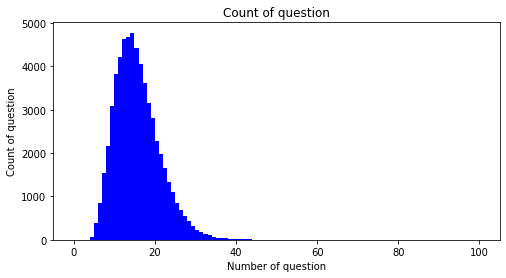

In [30]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(8, 4))
# histogram 선언
# bins: 히스토그램 값들에 대한 버켓 범위, 
# range: x축 값의 범위
# facecolor: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_question_counts, bins=100, range=[0, 100], facecolor='b', label='train')
# 그래프 제목
plt.title('Count of question')
# 그래프 x 축 라벨
plt.xlabel('Number of question')
# 그래프 y 축 라벨
plt.ylabel('Count of question')
plt.show()

In [31]:
# 데이터 길이
print(f"question 길이 최대:    {np.max(train_question_counts):4d}")
print(f"question 길이 최소:    {np.min(train_question_counts):4d}")
print(f"question 길이 평균:    {np.mean(train_question_counts):7.2f}")
print(f"question 길이 표준편차: {np.std(train_question_counts):7.2f}")
# https://ko.wikipedia.org/wiki/%EB%B0%B1%EB%B6%84%EC%9C%84%EC%88%98
# 백분위수(Percentile)는 크기가 있는 값들로 이뤄진 자료를 순서대로 나열했을 때 백분율로 나타낸 특정 위치의 값을 이르는 용어이다.
# 일반적으로 크기가 작은 것부터 나열하여 가장 작은 것을 0, 가장 큰 것을 100으로 한다.
# 100개의 값을 가진 어떤 자료의 20 백분위수는 그 자료의 값들 중 20번째로 작은 값을 뜻한다. 50 백분위수는 중앙값과 같다.
percentile25 = np.percentile(train_question_counts, 25)
percentile50 = np.percentile(train_question_counts, 50)
percentile75 = np.percentile(train_question_counts, 75)
percentileIQR = percentile75 - percentile25
percentileMAX = percentile75 + percentileIQR * 1.5
print(f"question 25/100분위:  {percentile25:7.2f}")
print(f"question 50/100분위:  {percentile50:7.2f}")
print(f"question 75/100분위:  {percentile75:7.2f}")
print(f"question IQR:        {percentileIQR:7.2f}")
print(f"question MAX/100분위: {percentileMAX:7.2f}")

question 길이 최대:      58
question 길이 최소:       3
question 길이 평균:      15.25
question 길이 표준편차:    5.50
question 25/100분위:    11.00
question 50/100분위:    14.00
question 75/100분위:    18.00
question IQR:           7.00
question MAX/100분위:   28.50


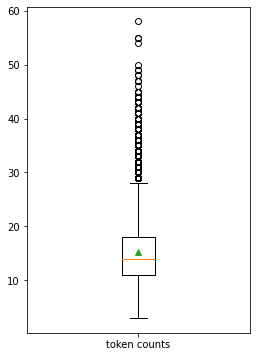

In [32]:
plt.figure(figsize=(4, 6))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 표현
# 참고: https://leebaro.tistory.com/entry/%EB%B0%95%EC%8A%A4-%ED%94%8C%EB%A1%AFbox-plot-%EC%84%A4%EB%AA%85
plt.boxplot(train_question_counts, labels=['token counts'], showmeans=True)
plt.show()

### 4.3.6 EDA : Context

* 위와 동일한 방법으로 context 항목에 대해서도 분석한다.

In [33]:
# token count
train_context_counts = [len(context) for context in contexts]
train_context_counts[:10]

[278, 278, 278, 278, 278, 278, 278, 278, 209, 209]

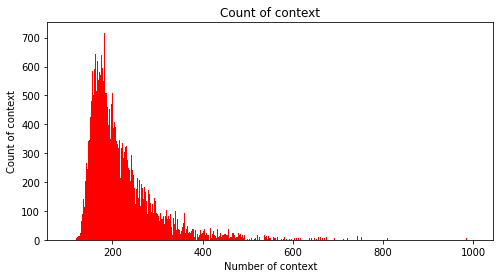

In [34]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(8, 4))
# histogram 선언
# bins: 히스토그램 값들에 대한 버켓 범위, 
# range: x축 값의 범위
# facecolor: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_context_counts, bins=900, range=[100, 1000], facecolor='r', label='train')
# 그래프 제목
plt.title('Count of context')
# 그래프 x 축 라벨
plt.xlabel('Number of context')
# 그래프 y 축 라벨
plt.ylabel('Count of context')
plt.show()

In [35]:
# 데이터 길이
print(f"context 길이 최대:    {np.max(train_context_counts):4d}")
print(f"context 길이 최소:    {np.min(train_context_counts):4d}")
print(f"context 길이 평균:    {np.mean(train_context_counts):7.2f}")
print(f"context 길이 표준편차: {np.std(train_context_counts):7.2f}")
# https://ko.wikipedia.org/wiki/%EB%B0%B1%EB%B6%84%EC%9C%84%EC%88%98
# 백분위수(Percentile)는 크기가 있는 값들로 이뤄진 자료를 순서대로 나열했을 때 백분율로 나타낸 특정 위치의 값을 이르는 용어이다.
# 일반적으로 크기가 작은 것부터 나열하여 가장 작은 것을 0, 가장 큰 것을 100으로 한다.
# 100개의 값을 가진 어떤 자료의 20 백분위수는 그 자료의 값들 중 20번째로 작은 값을 뜻한다. 50 백분위수는 중앙값과 같다.
percentile25 = np.percentile(train_context_counts, 25)
percentile50 = np.percentile(train_context_counts, 50)
percentile75 = np.percentile(train_context_counts, 75)
percentileIQR = percentile75 - percentile25
percentileMAX = percentile75 + percentileIQR * 1.5
print(f"context 25/100분위:  {percentile25:7.2f}")
print(f"context 50/100분위:  {percentile50:7.2f}")
print(f"context 75/100분위:  {percentile75:7.2f}")
print(f"context IQR:        {percentileIQR:7.2f}")
print(f"context MAX/100분위: {percentileMAX:7.2f}")

context 길이 최대:    4816
context 길이 최소:     108
context 길이 평균:     222.84
context 길이 표준편차:   97.68
context 25/100분위:   169.00
context 50/100분위:   199.00
context 75/100분위:   248.00
context IQR:          79.00
context MAX/100분위:  366.50


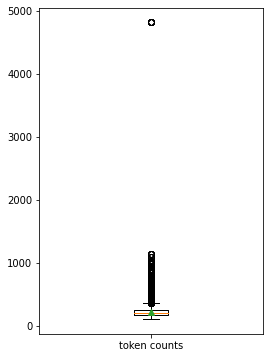

In [36]:
plt.figure(figsize=(4, 6))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 표현
# 참고: https://leebaro.tistory.com/entry/%EB%B0%95%EC%8A%A4-%ED%94%8C%EB%A1%AFbox-plot-%EC%84%A4%EB%AA%85
plt.boxplot(train_context_counts, labels=['token counts'], showmeans=True)
plt.show()

### 4.3.7 EDA : Answer

* 위와 동일한 방법으로 answer 항목에 대해서도 분석한다.

In [37]:
# token count
train_answer_starts = token_starts
train_answer_starts[:10]

[19, 168, 80, 6, 143, 0, 165, 216, 164, 7]

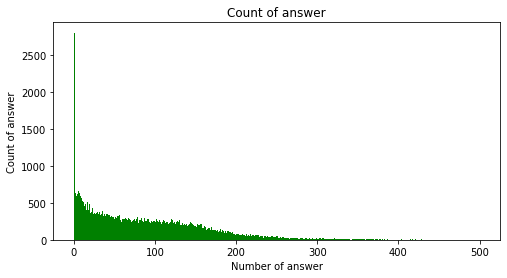

In [38]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(8, 4))
# histogram 선언
# bins: 히스토그램 값들에 대한 버켓 범위, 
# range: x축 값의 범위
# facecolor: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_answer_starts, bins=500, range=[0, 500], facecolor='g', label='train')
# 그래프 제목
plt.title('Count of answer')
# 그래프 x 축 라벨
plt.xlabel('Number of answer')
# 그래프 y 축 라벨
plt.ylabel('Count of answer')
plt.show()

In [39]:
# 데이터 길이
print(f"answer 위치 최대:    {np.max(train_answer_starts):4d}")
print(f"answer 위치 최소:    {np.min(train_answer_starts):4d}")
print(f"answer 위치 평균:    {np.mean(train_answer_starts):7.2f}")
print(f"answer 위치 표준편차: {np.std(train_answer_starts):7.2f}")
# https://ko.wikipedia.org/wiki/%EB%B0%B1%EB%B6%84%EC%9C%84%EC%88%98
# 백분위수(Percentile)는 크기가 있는 값들로 이뤄진 자료를 순서대로 나열했을 때 백분율로 나타낸 특정 위치의 값을 이르는 용어이다.
# 일반적으로 크기가 작은 것부터 나열하여 가장 작은 것을 0, 가장 큰 것을 100으로 한다.
# 100개의 값을 가진 어떤 자료의 20 백분위수는 그 자료의 값들 중 20번째로 작은 값을 뜻한다. 50 백분위수는 중앙값과 같다.
percentile25 = np.percentile(train_answer_starts, 25)
percentile50 = np.percentile(train_answer_starts, 50)
percentile75 = np.percentile(train_answer_starts, 75)
percentileIQR = percentile75 - percentile25
percentileMAX = percentile75 + percentileIQR * 1.5
print(f"answer 25/100분위:  {percentile25:7.2f}")
print(f"answer 50/100분위:  {percentile50:7.2f}")
print(f"answer 75/100분위:  {percentile75:7.2f}")
print(f"answer IQR:        {percentileIQR:7.2f}")
print(f"answer MAX/100분위: {percentileMAX:7.2f}")

answer 위치 최대:    1124
answer 위치 최소:       0
answer 위치 평균:      89.01
answer 위치 표준편차:   78.21
answer 25/100분위:    25.00
answer 50/100분위:    74.00
answer 75/100분위:   134.00
answer IQR:         109.00
answer MAX/100분위:  297.50


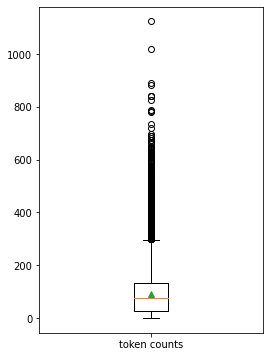

In [40]:
plt.figure(figsize=(4, 6))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 표현
# 참고: https://leebaro.tistory.com/entry/%EB%B0%95%EC%8A%A4-%ED%94%8C%EB%A1%AFbox-plot-%EC%84%A4%EB%AA%85
plt.boxplot(train_answer_starts, labels=['token counts'], showmeans=True)
plt.show()

### 4.3.8 EDA : Word Cloud

* 워드 클라우드(Word Cloud)란 자료의 빈도수를 시각화해서 나타내는 방법이다. 
* 문서의 핵심 단어를 한눈에 파악할 수 있고, 빅데이터를 분석할 때 데이터의 특징을 도출하기 위해서 활용된다. 
* 빈도수가 높은 단어일수록 글씨 크기가 큰 특징이 있다.

In [41]:
# train documents
documents = []

# 전체 데이터에서 title, context, question 문장을 모두 추출합니다. 
for data in tqdm(train_json["data"]):
    title = data["title"]
    documents.append(title)
    for paragraph in data["paragraphs"]:
        context = paragraph["context"]
        documents.append(context)

        for qa in paragraph["qas"]:
            assert len(qa["answers"]) == 1
            question = qa["question"]
            documents.append(question)

documents[:10]   # 그중 맨 앞 10개만 확인해 봅니다.

  0%|          | 0/1420 [00:00<?, ?it/s]

['파우스트_서곡',
 '1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로 해서 하나의 교향곡을 쓰려는 뜻을 갖는다. 이 시기 바그너는 1838년에 빛 독촉으로 산전수전을 다 걲은 상황이라 좌절과 실망에 가득했으며 메피스토펠레스를 만나는 파우스트의 심경에 공감했다고 한다. 또한 파리에서 아브네크의 지휘로 파리 음악원 관현악단이 연주하는 베토벤의 교향곡 9번을 듣고 깊은 감명을 받았는데, 이것이 이듬해 1월에 파우스트의 서곡으로 쓰여진 이 작품에 조금이라도 영향을 끼쳤으리라는 것은 의심할 여지가 없다. 여기의 라단조 조성의 경우에도 그의 전기에 적혀 있는 것처럼 단순한 정신적 피로나 실의가 반영된 것이 아니라 베토벤의 합창교향곡 조성의 영향을 받은 것을 볼 수 있다. 그렇게 교향곡 작곡을 1839년부터 40년에 걸쳐 파리에서 착수했으나 1악장을 쓴 뒤에 중단했다. 또한 작품의 완성과 동시에 그는 이 서곡(1악장)을 파리 음악원의 연주회에서 연주할 파트보까지 준비하였으나, 실제로는 이루어지지는 않았다. 결국 초연은 4년 반이 지난 후에 드레스덴에서 연주되었고 재연도 이루어졌지만, 이후에 그대로 방치되고 말았다. 그 사이에 그는 리엔치와 방황하는 네덜란드인을 완성하고 탄호이저에도 착수하는 등 분주한 시간을 보냈는데, 그런 바쁜 생활이 이 곡을 잊게 한 것이 아닌가 하는 의견도 있다.',
 '바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?',
 '바그너는 교향곡 작곡을 어디까지 쓴 뒤에 중단했는가?',
 '바그너가 파우스트 서곡을 쓸 때 어떤 곡의 영향을 받았는가?',
 '1839년 바그너가 교향곡의 소재로 쓰려고 했던 책은?',
 '파우스트 서곡의 라단조 조성이 영향을 받은 베토벤의 곡은?',
 '바그너가 파우스트를 처음으로 읽은 년도는?',
 '바그너가 처음 교향곡 작곡을 한 장소는?',
 '바그너의 1악장의 초연은 어디서 연주되었는가?']

In [42]:
# documents를 전부 이어 하나의 문장으로 만들면 이렇게 보입니다. 
" ".join(documents[:10])

'파우스트_서곡 1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로 해서 하나의 교향곡을 쓰려는 뜻을 갖는다. 이 시기 바그너는 1838년에 빛 독촉으로 산전수전을 다 걲은 상황이라 좌절과 실망에 가득했으며 메피스토펠레스를 만나는 파우스트의 심경에 공감했다고 한다. 또한 파리에서 아브네크의 지휘로 파리 음악원 관현악단이 연주하는 베토벤의 교향곡 9번을 듣고 깊은 감명을 받았는데, 이것이 이듬해 1월에 파우스트의 서곡으로 쓰여진 이 작품에 조금이라도 영향을 끼쳤으리라는 것은 의심할 여지가 없다. 여기의 라단조 조성의 경우에도 그의 전기에 적혀 있는 것처럼 단순한 정신적 피로나 실의가 반영된 것이 아니라 베토벤의 합창교향곡 조성의 영향을 받은 것을 볼 수 있다. 그렇게 교향곡 작곡을 1839년부터 40년에 걸쳐 파리에서 착수했으나 1악장을 쓴 뒤에 중단했다. 또한 작품의 완성과 동시에 그는 이 서곡(1악장)을 파리 음악원의 연주회에서 연주할 파트보까지 준비하였으나, 실제로는 이루어지지는 않았다. 결국 초연은 4년 반이 지난 후에 드레스덴에서 연주되었고 재연도 이루어졌지만, 이후에 그대로 방치되고 말았다. 그 사이에 그는 리엔치와 방황하는 네덜란드인을 완성하고 탄호이저에도 착수하는 등 분주한 시간을 보냈는데, 그런 바쁜 생활이 이 곡을 잊게 한 것이 아닌가 하는 의견도 있다. 바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가? 바그너는 교향곡 작곡을 어디까지 쓴 뒤에 중단했는가? 바그너가 파우스트 서곡을 쓸 때 어떤 곡의 영향을 받았는가? 1839년 바그너가 교향곡의 소재로 쓰려고 했던 책은? 파우스트 서곡의 라단조 조성이 영향을 받은 베토벤의 곡은? 바그너가 파우스트를 처음으로 읽은 년도는? 바그너가 처음 교향곡 작곡을 한 장소는? 바그너의 1악장의 초연은 어디서 연주되었는가?'

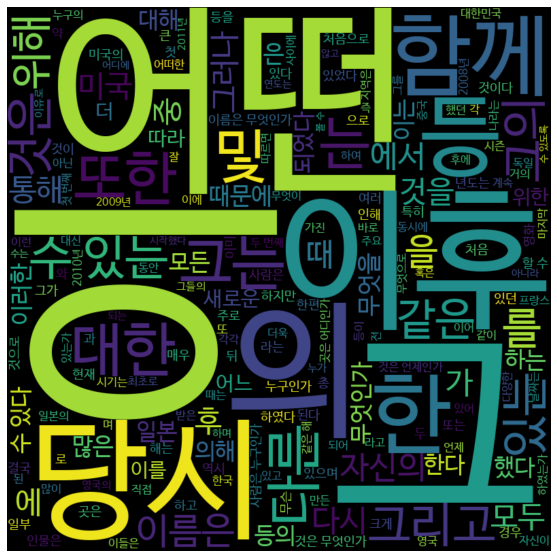

In [43]:
# WordCloud로 " ".join(documents)를 처리해 봅니다. 
wordcloud = WordCloud(width=800, height=800, font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate(" ".join(documents))
plt.figure(figsize=(10, 10))
# image 출력, interpolation 이미지 시각화 옵션
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 4.3.9 Data Load 🌟

* 지금까지 만든 데이터셋을 메모리에 로드한다.

In [44]:
train_json = os.path.join(data_dir, "korquad_train.json")
dev_json = os.path.join(data_dir, "korquad_dev.json")

In [45]:
class Config(dict):
    """
    json을 config 형태로 사용하기 위한 Class
    :param dict: config dictionary
    """
    __getattr__ = dict.__getitem__
    __setattr__ = dict.__setitem__


args = Config({
    'max_seq_length': 384,
    'max_query_length': 64,
})
args

{'max_seq_length': 384, 'max_query_length': 64}

In [46]:
# 생성한 데이터셋 파일을 메모리에 로딩하는 함수
def load_data(args, filename):
    inputs, segments, labels_start, labels_end = [], [], [], []

    n_discard = 0
    with open(filename, "r") as f:
        for i, line in enumerate(tqdm(f, desc=f"Loading ...")):
            data = json.loads(line)
            token_start = data.get("token_start")
            token_end = data.get("token_end")
            question = data["question"][:args.max_query_length]
            context = data["context"]
            answer_tokens = " ".join(context[token_start:token_end + 1])
            context_len = args.max_seq_length - len(question) - 3

            if token_end >= context_len:
                # 최대 길이내에 token이 들어가지 않은 경우 처리하지 않음
                n_discard += 1
                continue
            context = context[:context_len]
            assert len(question) + len(context) <= args.max_seq_length - 3

            tokens = ['[CLS]'] + question + ['[SEP]'] + context + ['[SEP]']
            ids = [vocab.piece_to_id(token) for token in tokens]
            ids += [0] * (args.max_seq_length - len(ids))
            inputs.append(ids)
            segs = [0] * (len(question) + 2) + [1] * (len(context) + 1)
            segs += [0] * (args.max_seq_length - len(segs))
            segments.append(segs)
            token_start += (len(question) + 2)
            labels_start.append(token_start)
            token_end += (len(question) + 2)
            labels_end.append(token_end)
    print(f'n_discard: {n_discard}')

    return (np.array(inputs), np.array(segments)), (np.array(labels_start), np.array(labels_end))

In [47]:
# train data load
train_inputs, train_labels = load_data(args, train_json)
print(f"train_inputs: {train_inputs[0].shape}")
print(f"train_inputs: {train_inputs[1].shape}")
print(f"train_labels: {train_labels[0].shape}")
print(f"train_labels: {train_labels[1].shape}")

# dev data load
dev_inputs, dev_labels = load_data(args, dev_json)
print(f"dev_inputs: {dev_inputs[0].shape}")
print(f"dev_inputs: {dev_inputs[1].shape}")
print(f"dev_labels: {dev_labels[0].shape}")
print(f"dev_labels: {dev_labels[1].shape}")

train_inputs[:10], train_labels[:10]

Loading ...: 0it [00:00, ?it/s]

n_discard: 430
train_inputs: (59977, 384)
train_inputs: (59977, 384)
train_labels: (59977,)
train_labels: (59977,)


Loading ...: 0it [00:00, ?it/s]

n_discard: 78
dev_inputs: (5696, 384)
dev_inputs: (5696, 384)
dev_labels: (5696,)
dev_labels: (5696,)


((array([[    5, 15798,    10, ...,     0,     0,     0],
         [    5, 15798,    10, ...,     0,     0,     0],
         [    5, 15798,    19, ...,     0,     0,     0],
         ...,
         [    5, 21666,    19, ...,     0,     0,     0],
         [    5,   964, 16865, ...,     0,     0,     0],
         [    5,   365,    15, ...,     0,     0,     0]]),
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]])),
 (array([ 37, 184,  98, ...,  74, 190,  35]),
  array([ 37, 185, 102, ...,  75, 191,  44])))

* 만든 데이터셋은 최종적으로 이렇게 생겼다.

In [48]:
# Question과 Context가 포함된 입력데이터 1번째
train_inputs[0][0]

array([    5, 15798,    10, 28935,     9,    11, 29566,    20, 14604,
       20424,  3904,    70,    11,  4648,    10,    19,  1910,     4,
       22070,    15, 15798,    10, 28935,     9,    11, 29566,    16,
         626, 14604,    38, 14028, 11773, 13829,   384,  8376,  3021,
        1239,  6874,    16,  1687,  5958,  2694,  5061,     7,    30,
        1613, 15798,    10, 28065,    75,  4415,  1816,  4978,    27,
         347,   145,   107,  2703,   263,    11,     1,    18,  5853,
          99,  9677,    24, 11969,    13,  7595,   437,  1019,  5907,
         257,  3794,  1972,    20, 11278,    11, 29566,     9,   612,
       12631, 13214,  1732,    76,     7,   110,  8802, 17581,   354,
        9648,  2060,    21,  1682, 22110, 18164,    17, 21076, 14980,
           9,  6874,    81, 11325,  4239,  3597,  1010,  1035, 17670,
           8,  2447,  1306,    35,   443,    11, 29566,     9,   315,
       12729, 14457,    30,  7938,  3742, 10766,   634,  9971, 17590,
       19424,    10,

In [49]:
# Question을 0으로, Context를 1로 구분해 준 Segment 데이터 1번째
train_inputs[1][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,

In [50]:
# Answer위치의 시작점과 끝점 라벨 1번째
train_labels[0][0], train_labels[1][0]

(37, 37)

### 5. Implementing Various Models

### 5.1 LSTM Model

In [51]:
def build_model_lstm(n_vocab, n_seq, d_model):
    tokens = tf.keras.layers.Input((None,), name='tokens')
    segments = tf.keras.layers.Input((None,), name='segments')

    hidden = tf.keras.layers.Embedding(n_vocab, d_model)(tokens) + tf.keras.layers.Embedding(2, d_model)(segments) # (bs, n_seq, d_model)

    hidden = tf.keras.layers.LSTM(d_model, return_sequences=True)(hidden)  # (bs, n_seq, d_model)
    hidden = tf.keras.layers.LSTM(d_model, return_sequences=True)(hidden)  # (bs, n_seq, d_model)
    hidden = tf.keras.layers.Dense(2)(hidden) # (bs, n_seq, 2)
    start_logits, end_logits = tf.split(hidden, 2, axis=-1)  # (bs, n_seq, 1), (bs, n_seq, 1)
    start_logits = tf.squeeze(start_logits, axis=-1)  # (bs, n_seq)
    start_outputs = tf.keras.layers.Softmax(name="start")(start_logits)
    end_logits = tf.squeeze(end_logits, axis=-1)  # (bs, n_seq)
    end_outputs = tf.keras.layers.Softmax(name="end")(end_logits)

    model = tf.keras.Model(inputs=(tokens, segments), outputs=(start_outputs, end_outputs))
    return model

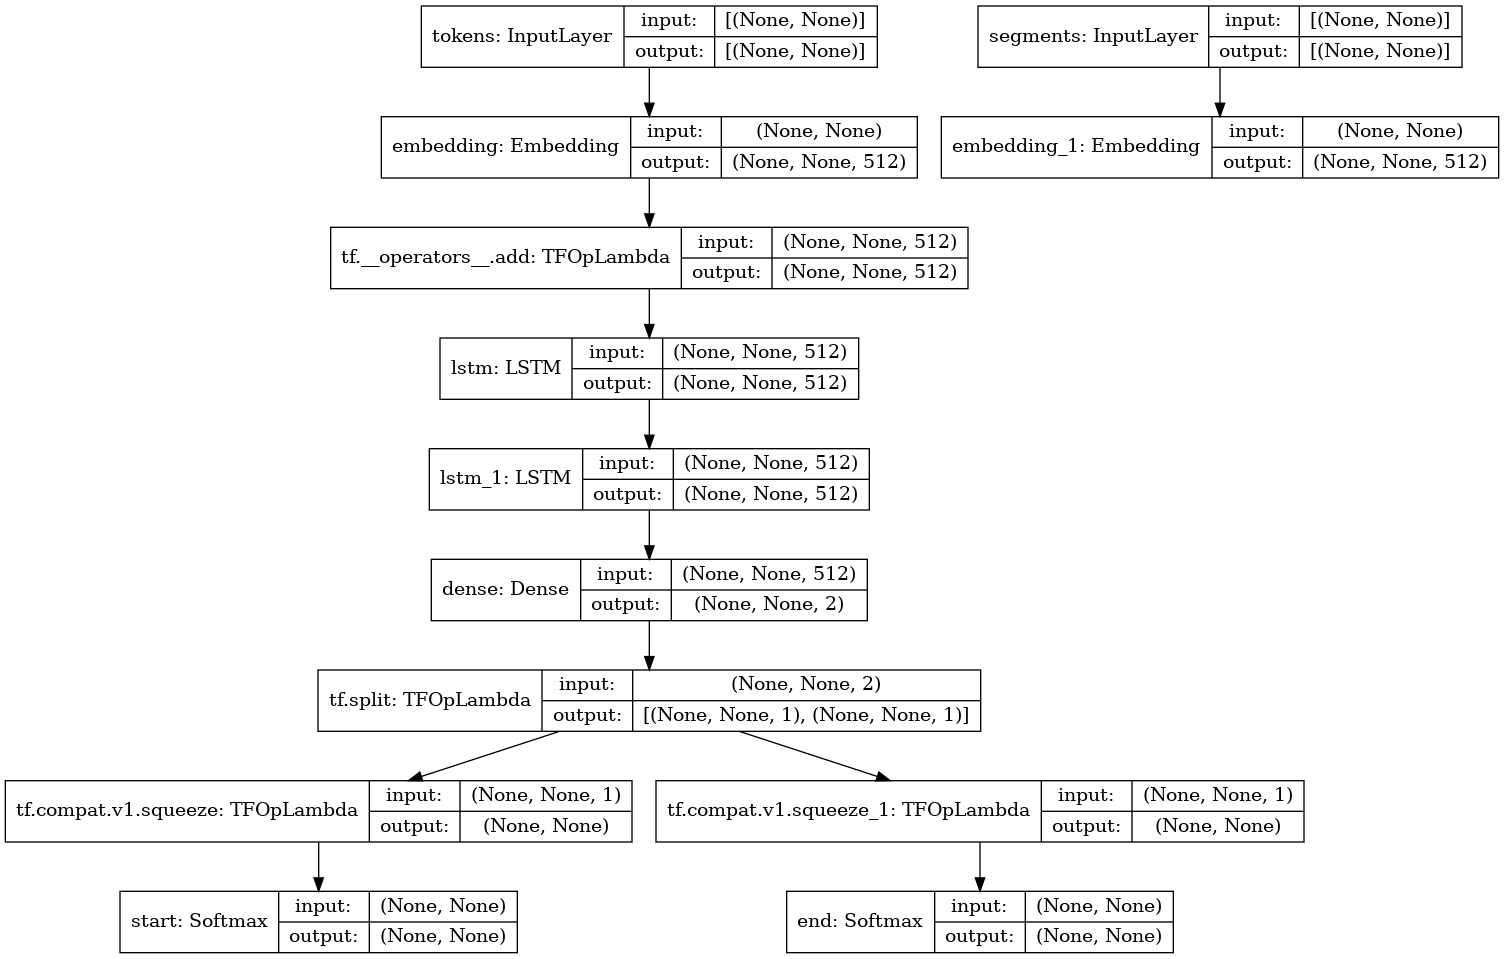

In [52]:
model1 = build_model_lstm(n_vocab=len(vocab), n_seq=512, d_model=512)
tf.keras.utils.plot_model(model1, 'model.png', show_shapes=True)

### 5.2 BERT Model

### 5.2.1 BERT Model Layers

In [53]:
# 유틸리티 함수들

def get_pad_mask(tokens, i_pad=0):
    """
    pad mask 계산하는 함수
    :param tokens: tokens (bs, n_seq)
    :param i_pad: id of pad
    :return mask: pad mask (pad: 1, other: 0)
    """
    mask = tf.cast(tf.math.equal(tokens, i_pad), tf.float32)
    mask = tf.expand_dims(mask, axis=1)
    return mask


def get_ahead_mask(tokens, i_pad=0):
    """
    ahead mask 계산하는 함수
    :param tokens: tokens (bs, n_seq)
    :param i_pad: id of pad
    :return mask: ahead and pad mask (ahead or pad: 1, other: 0)
    """
    n_seq = tf.shape(tokens)[1]
    ahead_mask = 1 - tf.linalg.band_part(tf.ones((n_seq, n_seq)), -1, 0)
    ahead_mask = tf.expand_dims(ahead_mask, axis=0)
    pad_mask = get_pad_mask(tokens, i_pad)
    mask = tf.maximum(ahead_mask, pad_mask)
    return mask


@tf.function(experimental_relax_shapes=True)
def gelu(x):
    """
    gelu activation 함수
    :param x: 입력 값
    :return: gelu activation result
    """
    return 0.5 * x * (1 + K.tanh(x * 0.7978845608 * (1 + 0.044715 * x * x)))


def kernel_initializer(stddev=0.02):
    """
    parameter initializer 생성
    :param stddev: 생성할 랜덤 변수의 표준편차
    """
    return tf.keras.initializers.TruncatedNormal(stddev=stddev)


def bias_initializer():
    """
    bias initializer 생성
    """
    return tf.zeros_initializer


class Config(dict):
    """
    json을 config 형태로 사용하기 위한 Class
    :param dict: config dictionary
    """
    __getattr__ = dict.__getitem__
    __setattr__ = dict.__setitem__

    @classmethod
    def load(cls, file):
        """
        file에서 Config를 생성 함
        :param file: filename
        """
        with open(file, 'r') as f:
            config = json.loads(f.read())
            return Config(config)

In [54]:
# mode == "embedding" 일 경우 Token Embedding Layer 로 사용되는 layer 클래스입니다. 

class SharedEmbedding(tf.keras.layers.Layer):
    """
    Weighed Shared Embedding Class
    """
    def __init__(self, config, name="weight_shared_embedding"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name
        """
        super().__init__(name=name)

        self.n_vocab = config.n_vocab
        self.d_model = config.d_model
    
    def build(self, input_shape):
        """
        shared weight 생성
        :param input_shape: Tensor Shape (not used)
        """
        with tf.name_scope("shared_embedding_weight"):
            self.shared_weights = self.add_weight(
                "weights",
                shape=[self.n_vocab, self.d_model],
                initializer=kernel_initializer()
            )

    def call(self, inputs, mode="embedding"):
        """
        layer 실행
        :param inputs: 입력
        :param mode: 실행 모드
        :return: embedding or linear 실행 결과
        """
        # mode가 embedding일 경우 embedding lookup 실행
        if mode == "embedding":
            return self._embedding(inputs)
        # mode가 linear일 경우 linear 실행
        elif mode == "linear":
            return self._linear(inputs)
        # mode가 기타일 경우 오류 발생
        else:
            raise ValueError(f"mode {mode} is not valid.")
    
    def _embedding(self, inputs):
        """
        embedding lookup
        :param inputs: 입력
        """
        embed = tf.gather(self.shared_weights, tf.cast(inputs, tf.int32))
        return embed

    def _linear(self, inputs):  # (bs, n_seq, d_model)
        """
        linear 실행
        :param inputs: 입력
        """
        n_batch = tf.shape(inputs)[0]
        n_seq = tf.shape(inputs)[1]
        inputs = tf.reshape(inputs, [-1, self.d_model])  # (bs * n_seq, d_model)
        outputs = tf.matmul(inputs, self.shared_weights, transpose_b=True)
        outputs = tf.reshape(outputs, [n_batch, n_seq, self.n_vocab])  # (bs, n_seq, n_vocab)
        return outputs

In [55]:
class PositionalEmbedding(tf.keras.layers.Layer):
    """
    Positional Embedding Class
    """
    def __init__(self, config, name="position_embedding"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name
        """
        super().__init__(name=name)
        
        self.embedding = tf.keras.layers.Embedding(config.n_seq, config.d_model, embeddings_initializer=kernel_initializer())

    def call(self, inputs):
        """
        layer 실행
        :param inputs: 입력
        :return embed: positional embedding lookup 결과
        """
        position = tf.cast(tf.math.cumsum(tf.ones_like(inputs), axis=1, exclusive=True), tf.int32)
        embed = self.embedding(position)
        return embed

In [56]:
class ScaleDotProductAttention(tf.keras.layers.Layer):
    """
    Scale Dot Product Attention Class
    """
    def __init__(self, name="scale_dot_product_attention"):
        """
        생성자
        :param name: layer name
        """
        super().__init__(name=name)

    def call(self, Q, K, V, attn_mask):
        """
        layer 실행
        :param Q: Q value
        :param K: K value
        :param V: V value
        :param attn_mask: 실행 모드
        :return attn_out: attention 실행 결과
        """
        attn_score = tf.matmul(Q, K, transpose_b=True)
        scale = tf.math.sqrt(tf.cast(tf.shape(K)[-1], tf.float32))
        attn_scale = tf.math.divide(attn_score, scale)
        attn_scale -= 1.e9 * attn_mask
        attn_prob = tf.nn.softmax(attn_scale, axis=-1)
        attn_out = tf.matmul(attn_prob, V)
        return attn_out

In [57]:
class MultiHeadAttention(tf.keras.layers.Layer):
    """
    Multi Head Attention Class
    """
    def __init__(self, config, name="multi_head_attention"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name
        """
        super().__init__(name=name)

        self.d_model = config.d_model
        self.n_head = config.n_head
        self.d_head = config.d_head

        # Q, K, V input dense layer
        self.W_Q = tf.keras.layers.Dense(config.n_head * config.d_head, kernel_initializer=kernel_initializer(), bias_initializer=bias_initializer())
        self.W_K = tf.keras.layers.Dense(config.n_head * config.d_head, kernel_initializer=kernel_initializer(), bias_initializer=bias_initializer())
        self.W_V = tf.keras.layers.Dense(config.n_head * config.d_head, kernel_initializer=kernel_initializer(), bias_initializer=bias_initializer())
        # Scale Dot Product Attention class
        self.attention = ScaleDotProductAttention(name="self_attention")
        # output dense layer
        self.W_O = tf.keras.layers.Dense(config.d_model, kernel_initializer=kernel_initializer(), bias_initializer=bias_initializer())

    def call(self, Q, K, V, attn_mask):
        """
        layer 실행
        :param Q: Q value
        :param K: K value
        :param V: V value
        :param attn_mask: 실행 모드
        :return attn_out: attention 실행 결과
        """
        # reshape Q, K, V, attn_mask
        batch_size = tf.shape(Q)[0]
        Q_m = tf.transpose(tf.reshape(self.W_Q(Q), [batch_size, -1, self.n_head, self.d_head]), [0, 2, 1, 3])  # (bs, n_head, Q_len, d_head)
        K_m = tf.transpose(tf.reshape(self.W_K(K), [batch_size, -1, self.n_head, self.d_head]), [0, 2, 1, 3])  # (bs, n_head, K_len, d_head)
        V_m = tf.transpose(tf.reshape(self.W_V(V), [batch_size, -1, self.n_head, self.d_head]), [0, 2, 1, 3])  # (bs, n_head, K_len, d_head)
        attn_mask_m = tf.expand_dims(attn_mask, axis=1)
        # Scale Dot Product Attention with multi head Q, K, V, attn_mask
        attn_out = self.attention(Q_m, K_m, V_m, attn_mask_m)  # (bs, n_head, Q_len, d_head)
        # transpose and liner
        attn_out_m = tf.transpose(attn_out, perm=[0, 2, 1, 3])  # (bs, Q_len, n_head, d_head)
        attn_out = tf.reshape(attn_out_m, [batch_size, -1, config.n_head * config.d_head])  # (bs, Q_len, d_model)
        attn_out = self.W_O(attn_out) # (bs, Q_len, d_model)

        return attn_out

In [58]:
class PositionWiseFeedForward(tf.keras.layers.Layer):
    """
    Position Wise Feed Forward Class
    """
    def __init__(self, config, name="feed_forward"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name
        """
        super().__init__(name=name)

        self.W_1 = tf.keras.layers.Dense(config.d_ff, activation=gelu, kernel_initializer=kernel_initializer(), bias_initializer=bias_initializer())
        self.W_2 = tf.keras.layers.Dense(config.d_model, kernel_initializer=kernel_initializer(), bias_initializer=bias_initializer())

    def call(self, inputs):
        """
        layer 실행
        :param inputs: inputs
        :return ff_val: feed forward 실행 결과
        """
        ff_val = self.W_2(self.W_1(inputs))
        return ff_val

In [59]:
class EncoderLayer(tf.keras.layers.Layer):
    """
    Encoder Layer Class
    """
    def __init__(self, config, name="encoder_layer"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name
        """
        super().__init__(name=name)

        self.self_attention = MultiHeadAttention(config)
        self.norm1 = tf.keras.layers.LayerNormalization(epsilon=config.layernorm_epsilon)

        self.ffn = PositionWiseFeedForward(config)
        self.norm2 = tf.keras.layers.LayerNormalization(epsilon=config.layernorm_epsilon)

        self.dropout = tf.keras.layers.Dropout(config.dropout)
 
    def call(self, enc_embed, self_mask):
        """
        layer 실행
        :param enc_embed: enc_embed 또는 이전 EncoderLayer의 출력
        :param self_mask: enc_tokens의 pad mask
        :return enc_out: EncoderLayer 실행 결과
        """
        self_attn_val = self.self_attention(enc_embed, enc_embed, enc_embed, self_mask)
        norm1_val = self.norm1(enc_embed + self.dropout(self_attn_val))

        ffn_val = self.ffn(norm1_val)
        enc_out = self.norm2(norm1_val + self.dropout(ffn_val))

        return enc_out

### 5.2.2 BERT Model

* 위와 같이 BERT를 구성하는 레이어들이 준비되었다. 
* 해당 레이어들을 사용해 BERT 모델을 구현한다.

In [60]:
class BERT(tf.keras.layers.Layer):
    """
    BERT Class
    """
    def __init__(self, config, name="bert"):
        """
        생성자
        :param config: Config 객체
        :param name: layer name
        """
        super().__init__(name=name)

        self.i_pad = config.i_pad
        self.embedding = SharedEmbedding(config)
        self.position = PositionalEmbedding(config)
        self.segment = tf.keras.layers.Embedding(2, config.d_model, embeddings_initializer=kernel_initializer())
        self.norm = tf.keras.layers.LayerNormalization(epsilon=config.layernorm_epsilon)
        
        self.encoder_layers = [EncoderLayer(config, name=f"encoder_layer_{i}") for i in range(config.n_layer)]

        self.dropout = tf.keras.layers.Dropout(config.dropout)

    def call(self, enc_tokens, segments):
        """
        layer 실행
        :param enc_tokens: encoder tokens
        :param segments: token segments
        :return logits_cls: CLS 결과 logits
        :return logits_lm: LM 결과 logits
        """
        enc_self_mask = get_pad_mask(enc_tokens, self.i_pad)

        enc_embed = self.get_embedding(enc_tokens, segments)

        enc_out = self.dropout(enc_embed)
        for encoder_layer in self.encoder_layers:
            enc_out = encoder_layer(enc_out, enc_self_mask)

        logits_cls = enc_out[:,0]
        logits_lm = enc_out
        return logits_cls, logits_lm
    
    def get_embedding(self, tokens, segments):
        """
        token embedding, position embedding lookup
        :param tokens: 입력 tokens
        :param segments: 입력 segments
        :return embed: embedding 결과
        """
        embed = self.embedding(tokens) + self.position(tokens) + self.segment(segments)
        embed = self.norm(embed)
        return embed

### 5.2.3 BERT Model + Fully Connected Layer

* KorQuAD 문제를 풀기 위해 앞서 만든 BERT 모델에 Fully Connected layer를 이어서 finetuning할 수 있도록 한다.

In [61]:
class BERT4KorQuAD(tf.keras.Model):
    def __init__(self, config):
        super().__init__(name='BERT4KorQuAD')

        self.bert = BERT(config)
        self.dense = tf.keras.layers.Dense(2)
    
    def call(self, enc_tokens, segments):
        logits_cls, logits_lm = self.bert(enc_tokens, segments)

        hidden = self.dense(logits_lm) # (bs, n_seq, 2)
        start_logits, end_logits = tf.split(hidden, 2, axis=-1)  # (bs, n_seq, 1), (bs, n_seq, 1)

        start_logits = tf.squeeze(start_logits, axis=-1)
        start_outputs = tf.keras.layers.Softmax(name="start")(start_logits)

        end_logits = tf.squeeze(end_logits, axis=-1)
        end_outputs = tf.keras.layers.Softmax(name="end")(end_logits)

        return start_outputs, end_outputs

### 5.2.4 Accuracy, Loss

In [62]:
def train_epoch(model, dataset, loss_fn, acc_fn, optimizer):
    metric_start_loss = tf.keras.metrics.Mean(name='start_loss')
    metric_end_loss = tf.keras.metrics.Mean(name='end_loss')
    metric_start_acc = tf.keras.metrics.Mean(name='start_acc')
    metric_end_acc = tf.keras.metrics.Mean(name='end_acc')

    p_bar = tqdm(dataset)
    for batch, ((enc_tokens, segments), (start_labels, end_labels)) in enumerate(p_bar):
        with tf.GradientTape() as tape:
            start_outputs, end_outputs = model(enc_tokens, segments)

            start_loss = loss_fn(start_labels, start_outputs)
            end_loss = loss_fn(end_labels, end_outputs)
            loss = start_loss + end_loss

            start_acc = acc_fn(start_labels, start_outputs)
            end_acc = acc_fn(end_labels, end_outputs)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        metric_start_loss(start_loss)
        metric_end_loss(end_loss)
        metric_start_acc(start_acc)
        metric_end_acc(end_acc)
        if batch % 10 == 9:
            p_bar.set_description(f'loss: {metric_start_loss.result():0.4f}, {metric_end_loss.result():0.4f}, acc: {metric_start_acc.result():0.4f}, {metric_end_acc.result():0.4f}')
    p_bar.close()

    return metric_start_loss.result(), metric_end_loss.result(), metric_start_acc.result(), metric_end_acc.result()

In [63]:
def eval_epoch(model, dataset, loss_fn, acc_fn):
    metric_start_loss = tf.keras.metrics.Mean(name='start_loss')
    metric_end_loss = tf.keras.metrics.Mean(name='end_loss')
    metric_start_acc = tf.keras.metrics.Mean(name='start_acc')
    metric_end_acc = tf.keras.metrics.Mean(name='end_acc')

    for batch, ((enc_tokens, segments), (start_labels, end_labels)) in enumerate(dataset):
        start_outputs, end_outputs = model(enc_tokens, segments)

        start_loss = loss_fn(start_labels, start_outputs)
        end_loss = loss_fn(end_labels, end_outputs)

        start_acc = acc_fn(start_labels, start_outputs)
        end_acc = acc_fn(end_labels, end_outputs)

        metric_start_loss(start_loss)
        metric_end_loss(end_loss)
        metric_start_acc(start_acc)
        metric_end_acc(end_acc)

    return metric_start_loss.result(), metric_end_loss.result(), metric_start_acc.result(), metric_end_acc.result()

### 6. Training Models

### 6.1 LSTM

In [64]:
model1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4), metrics=["accuracy"])

In [65]:
# early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_start_accuracy', patience=3)
# save weights
save_weights = tf.keras.callbacks.ModelCheckpoint(os.path.join(data_dir, "korquad_lstm.hdf5"), 
                                                  monitor='val_start_accuracy', verbose=1, save_best_only=True, mode='max', 
                                                  save_freq='epoch', save_weights_only=True)

history = model1.fit(train_inputs, train_labels, epochs=10, batch_size=128, 
                    validation_data=(dev_inputs, dev_labels), callbacks=[early_stopping, save_weights])

Epoch 1/10
469/469 [==============================] - 212s 441ms/step - loss: 9.1253 - start_loss: 4.4191 - end_loss: 4.7062 - start_accuracy: 0.0685 - end_accuracy: 0.0525 - val_loss: 8.2433 - val_start_loss: 3.9171 - val_end_loss: 4.3262 - val_start_accuracy: 0.0915 - val_end_accuracy: 0.0795

Epoch 00001: val_start_accuracy improved from -inf to 0.09147, saving model to /aiffel/aiffel/bert_qna/data/korquad_lstm.hdf5
Epoch 2/10
469/469 [==============================] - 214s 457ms/step - loss: 7.2979 - start_loss: 3.4787 - end_loss: 3.8192 - start_accuracy: 0.1254 - end_accuracy: 0.1169 - val_loss: 8.1871 - val_start_loss: 3.8882 - val_end_loss: 4.2989 - val_start_accuracy: 0.0983 - val_end_accuracy: 0.0753

Epoch 00002: val_start_accuracy improved from 0.09147 to 0.09831, saving model to /aiffel/aiffel/bert_qna/data/korquad_lstm.hdf5
Epoch 3/10
469/469 [==============================] - 215s 458ms/step - loss: 6.6992 - start_loss: 3.2161 - end_loss: 3.4832 - start_accuracy: 0.1551 -

### 6.2 No Pretrained BERT Model

In [66]:
config = Config({"d_model": 512, "n_head": 8, "d_head": 64, "dropout": 0.1, "d_ff": 1024, "layernorm_epsilon": 0.001, "n_layer": 6, "n_seq": 384, "n_vocab": 0, "i_pad": 0})
config.n_vocab = len(vocab)
config.i_pad = vocab.pad_id()
config

{'d_model': 512,
 'n_head': 8,
 'd_head': 64,
 'dropout': 0.1,
 'd_ff': 1024,
 'layernorm_epsilon': 0.001,
 'n_layer': 6,
 'n_seq': 384,
 'n_vocab': 32007,
 'i_pad': 0}

In [67]:
bert_batch_size = 32 

train_dataset = tf.data.Dataset.from_tensor_slices((train_inputs, train_labels)).shuffle(10000).batch(bert_batch_size)
dev_dataset = tf.data.Dataset.from_tensor_slices((dev_inputs, dev_labels)).batch(bert_batch_size)

In [68]:
model2 = BERT4KorQuAD(config)

In [69]:
loss_fn = tf.keras.losses.sparse_categorical_crossentropy
acc_fn = tf.keras.metrics.sparse_categorical_accuracy

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4)

best_acc = .0
patience = 0
NS_loss, NE_loss, NS_acc, NE_acc = [], [], [], []

for epoch in range(20):
    train_epoch(model2, train_dataset, loss_fn, acc_fn, optimizer)
    start_loss, end_loss, start_acc, end_acc = eval_epoch(model2, dev_dataset, loss_fn, acc_fn)
    print(f'eval {epoch} >> loss: {start_loss:0.4f}, {end_loss:0.4f}, acc: {start_acc:0.4f}, {end_acc:0.4f}')
    
    NS_loss.append(float(f'{start_loss:0.4f}'))
    NE_loss.append(float(f'{end_loss:0.4f}'))
    NS_acc.append(float(f'{start_acc:0.4f}'))
    NE_acc.append(float(f'{end_acc:0.4f}'))    
    
    acc = start_acc + end_acc
    if best_acc < acc:
        patience = 0
        best_acc = acc
        model2.save_weights(os.path.join(data_dir, "korquad_bert_none_pretrain.hdf5"))
        print(f'save best model')
    else:
        patience += 1
    if 5 <= patience:
        print(f'early stopping')
        break

  0%|          | 0/1875 [00:00<?, ?it/s]

eval 0 >> loss: 3.6820, 4.2630, acc: 0.1261, 0.1194
save best model


  0%|          | 0/1875 [00:00<?, ?it/s]

eval 1 >> loss: 5.9506, 5.9506, acc: 0.0026, 0.0039


  0%|          | 0/1875 [00:00<?, ?it/s]

eval 2 >> loss: 5.9506, 5.9506, acc: 0.0025, 0.0070


  0%|          | 0/1875 [00:00<?, ?it/s]

eval 3 >> loss: 5.9506, 5.9506, acc: 0.0019, 0.0053


  0%|          | 0/1875 [00:00<?, ?it/s]

eval 4 >> loss: 5.9506, 5.9506, acc: 0.0025, 0.0077


  0%|          | 0/1875 [00:00<?, ?it/s]

eval 5 >> loss: 5.9506, 5.9506, acc: 0.0025, 0.0047
early stopping


### 6.3 Pretrained BERT Model

### 6.3.1 Load Pretrained Model

In [70]:
checkpoint_file = os.path.join(model_dir, 'bert_pretrain_32000.hdf5')

model = BERT4KorQuAD(config)

if os.path.exists(checkpoint_file):
    #  pretrained model 을 로드하기 위해 먼저 모델이 생성되어 있어야 한다.
    enc_tokens = np.random.randint(0, len(vocab), (4, 10))
    segments = np.random.randint(0, 2, (4, 10))
    model(enc_tokens, segments)
    
    # checkpoint 파일로부터 필요한 layer를 불러온다. 
    model.load_weights(os.path.join(model_dir, "bert_pretrain_32000.hdf5"), by_name=True)

    model.summary()
else:
    print('NO Pretrained Model')

Model: "BERT4KorQuAD"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (BERT)                  multiple                  29202944  
_________________________________________________________________
dense_74 (Dense)             multiple                  1026      
Total params: 29,203,970
Trainable params: 29,203,970
Non-trainable params: 0
_________________________________________________________________


### 6.3.2 Pretrained Model Finetune 🌟

In [71]:
loss_fn = tf.keras.losses.sparse_categorical_crossentropy
acc_fn = tf.keras.metrics.sparse_categorical_accuracy

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4)

best_acc = .0
patience = 0
S_loss, E_loss, S_acc, E_acc = [], [], [], []

for epoch in range(20):
    train_epoch(model, train_dataset, loss_fn, acc_fn, optimizer)
    start_loss, end_loss, start_acc, end_acc = eval_epoch(model, dev_dataset, loss_fn, acc_fn)
    print(f'eval {epoch} >> loss: {start_loss:0.4f}, {end_loss:0.4f}, acc: {start_acc:0.4f}, {end_acc:0.4f}')
    
    S_loss.append(float(f'{start_loss:0.4f}'))
    E_loss.append(float(f'{end_loss:0.4f}'))
    S_acc.append(float(f'{start_acc:0.4f}'))
    E_acc.append(float(f'{end_acc:0.4f}'))    
    
    acc = start_acc + end_acc
    if best_acc < acc:
        patience = 0
        best_acc = acc
        model.save_weights(os.path.join(data_dir, "korquad_bert_pretrain.hdf5"))
        print(f'save best model')
    else:
        patience += 1
    if 5 <= patience:
        print(f'early stopping')
        break

  0%|          | 0/1875 [00:00<?, ?it/s]

eval 0 >> loss: 1.7497, 1.9605, acc: 0.5555, 0.5212
save best model


  0%|          | 0/1875 [00:00<?, ?it/s]

eval 1 >> loss: 1.7634, 1.9918, acc: 0.5583, 0.5093


  0%|          | 0/1875 [00:00<?, ?it/s]

eval 2 >> loss: 1.7436, 2.0655, acc: 0.5765, 0.5341
save best model


  0%|          | 0/1875 [00:00<?, ?it/s]

eval 3 >> loss: 1.8680, 2.2164, acc: 0.5715, 0.5184


  0%|          | 0/1875 [00:00<?, ?it/s]

eval 4 >> loss: 2.3913, 2.4358, acc: 0.5320, 0.4963


  0%|          | 0/1875 [00:00<?, ?it/s]

eval 5 >> loss: 2.3534, 2.7200, acc: 0.5613, 0.5149


  0%|          | 0/1875 [00:00<?, ?it/s]

eval 6 >> loss: 2.1725, 2.6474, acc: 0.5481, 0.5081


  0%|          | 0/1875 [00:00<?, ?it/s]

eval 7 >> loss: 2.3163, 2.6920, acc: 0.5304, 0.4903
early stopping


### 7. Doing an Inference

* LSTM의 경우 Loss가 너무 높고, Accuracy가 너무 낮은 관계로 따로 답변을 출력해보지 않는다. 

### 7.1 Predict Function

In [72]:
def do_predict(model, question, context):
    """
    입력에 대한 답변 생성하는 함수
    :param model: model
    :param question: 입력 문자열
    :param context: 입력 문자열
    """
    q_tokens = vocab.encode_as_pieces(question)[:args.max_query_length]
    c_tokens = vocab.encode_as_pieces(context)[:args.max_seq_length - len(q_tokens) - 3]
    tokens = ['[CLS]'] + q_tokens + ['[SEP]'] + c_tokens + ['[SEP]']
    token_ids = [vocab.piece_to_id(token) for token in tokens]
    segments = [0] * (len(q_tokens) + 2) + [1] * (len(c_tokens) + 1)

    y_start, y_end = model(np.array([token_ids]), np.array([segments]))
    # print(y_start, y_end)
    y_start_idx = K.argmax(y_start, axis=-1)[0].numpy()
    y_end_idx = K.argmax(y_end, axis=-1)[0].numpy()
    answer_tokens = tokens[y_start_idx:y_end_idx + 1]

    return vocab.decode_pieces(answer_tokens)

### 7.2 No Pretrained Model

In [73]:
dev_json = os.path.join(data_dir, "korquad_dev.json")

with open(dev_json) as f:
    for i, line in enumerate(f):
        data = json.loads(line)
        question = vocab.decode_pieces(data['question'])
        context = vocab.decode_pieces(data['context'])
        answer = data['answer']
        answer_predict = do_predict(model2, question, context)
        if answer in answer_predict:
            print(i)
            print("질문 : ", question)
            print("지문 : ", context)
            print("정답 : ", answer)
            print("예측 : ", answer_predict, "\n")
        if 100 < i:
            break

0
질문 :  임종석이 여의도 농민 폭력 시위를 주도한 혐의로 지명수배 된 날은?
지문 :  1989년 2월 15일 여의도 농민 폭력 시위를 주도한 혐의(폭력행위등처벌에관한법률위반)으로 지명수배되었다. 1989년 3월 12일 서울지방검찰청 공안부는 임종석의 사전구속영장을 발부받았다. 같은 해 6월 30일 평양축전에 임수경을 대표로 파견하여 국가보안법위반 혐의가 추가되었다. 경찰은 12월 18일~20일 사이 서울 경희대학교에서 임종석이 성명 발표를 추진하고 있다는 첩보를 입수했고, 12월 18일 오전 7시 40분 경 가스총과 전자봉으로 무장한 특공조 및 대공과 직원 12명 등 22명의 사복 경찰을 승용차 8대에 나누어 경희대학교에 투입했다. 1989년 12월 18일 오전 8시 15분 경 서울청량리경찰서는 호위 학생 5명과 함께 경희대학교 학생회관 건물 계단을 내려오는 임종석을 발견, 검거해 구속을 집행했다. 임종석은 청량리경찰서에서 약 1시간 동안 조사를 받은 뒤 오전 9시 50분 경 서울 장안동의 서울지방경찰청 공안분실로 인계되었다.
정답 :  1989년 2월 15일
예측 :  [CLS] 임종석이 여의도 농민 폭력 시위를 주도한 혐의로 지명수배 된 날은?[SEP] 1989년 2월 15일 여의도 농민 폭력 시위를 주도한 혐의(폭력행위등처벌에관한법률위반)으로 지명수배되었다. 1989년 3월 12일 서울지방검찰청 공안부는 임종석의 사전구속영장을 발부받았다. 같은 해 6월 30일 평양축전에 임수경을 대표로 파견하여 국가보안법위반 혐의가 추가되었다. 경찰은 12월 18일~20일 사이 서울 경희대학교에서 임종석이 성명 발표를 추진하고 있다는 첩보를 입수했고, 

1
질문 :  1989년 6월 30일 평양축전에 대표로 파견 된 인물은?
지문 :  1989년 2월 15일 여의도 농민 폭력 시위를 주도한 혐의(폭력행위등처벌에관한법률위반)으로 지명수배되었다. 1989년 3월 12일 서울지방검찰청 공안부는 임종석의 사전구속영장을 발부받았다. 같은 해 6월 30일 평양축전에 임수경

34
질문 :  알렉산더 헤이그는 레이건의 조언자들을 무엇이라고 묘사하였는가?
지문 :  그의 편에 헤이그는 지구촌의 논점들의 국내적 정치 노력들에 관해서만 근심한 레이건의 가까운 조언자들을 "외교 정책의 아마추어"로 묘사하였다. 1982년 6월 25일 결국적으로 온 그의 국무장관으로서 사임은 불가능한 상황이 된 것을 끝냈다. 헤이그는 개인적 생활로 돌아갔다가 1988년 대통령 선거를 위한 공화당 후보직을 안정시키는 시도를 하는 데 충분하게 정계로 돌아갔으나 후보직을 이기는 데 성원을 가지지 않았다. 그는 외교 정책 논쟁들에 연설자로서 활동적으로 남아있었으나 그의 전념은 정치에서 개인적 생활로 옮겨졌다. 그는 Worldwide Associates Inc.의 국제적 상담 회사에 의하여 기용되었고, 그 기구의 의장과 회장이 되었다.
정답 :  외교 정책의 아마추어
예측 :  헤이그는 레이건의 조언자들을 무엇이라고 묘사하였는가?[SEP] 그의 편에 헤이그는 지구촌의 논점들의 국내적 정치 노력들에 관해서만 근심한 레이건의 가까운 조언자들을 "외교 정책의 아마추어"로 묘사하였다. 1982년 6월 25일 결국적으로 온 그의 국무장관으로서 사임은 불가능한 상황이 된 것을 끝냈다. 헤이그는 개인적 생활로 돌아갔다가 1988년 대통령 선거를 위한 공화당 후보직을 안정시키는 시도를 하는 데 충분하게 정계로 돌아갔으나 후보직을 이기는 데 

35
질문 :  헤이그가 사적생활을 하다가 정계로 돌아갔던 해는 언제인가?
지문 :  그의 편에 헤이그는 지구촌의 논점들의 국내적 정치 노력들에 관해서만 근심한 레이건의 가까운 조언자들을 "외교 정책의 아마추어"로 묘사하였다. 1982년 6월 25일 결국적으로 온 그의 국무장관으로서 사임은 불가능한 상황이 된 것을 끝냈다. 헤이그는 개인적 생활로 돌아갔다가 1988년 대통령 선거를 위한 공화당 후보직을 안정시키는 시도를 하는 데 충분하게 정계로 돌아갔으나 후보직을 이기는 데 성원을 가지지 않았다. 그는 외교 정책 논쟁들에 연설자로서 활동적으로

70
질문 :  2012년 중국 BTV에서 노아의 방주가 발견되었다고 보도한 나라는?
지문 :  일반적으로 터키의 아라랏 산의 경우, 실제 성경 속에 등장하는 아라랏 산은 지금 아라랏이라 불리는 하나의 산이 아니라 당시 아라랏이라고 불리던 광대한 지역의 산들을 모두 가리키는 표현이라는 주장도 나와 있으며, 또한 목재로 만들어진 방주가 현재까지 남아있을 수는 없다는 비판도 받고 있다. 예를 들어, 1955년 프랑스의 탐험가인 Fernand Navarra가 발견한 목재 파편의 경우, 스페인의 임업 연구소에서 목재의 특성을 토대로 5000년 전의 것이라고 밝히긴 했으나 그 신빙성에 문제점이 있었고 후에 방사성 동위원소 측정법 등의 첨단 과학의 도움을 받은 5개 연구소에서 모두 기원 이후의 시기로 연대를 측정했다. 2009년 뿐 아니라 거의 수년에 한번씩 어디선가 노아의 방주를 발견했다는 주장들이 제시되었지만, 심지어 같은 창조과학을 주장하는 사람들에게조차 비판받을 정도였다. 노아의 방주가 다른 여러 지방에서 발견되었다는 주장이 있으나 너무나 다양한 지방(중국, 터키, 인도 등)에 걸쳐있고, 그 주장도 각각 제각각이므로 신빙성이 없다. 예를 들자면, 중국 BTV에서는 2012년에 중국에서 노아의 방주가 발견되었다는 보도를 하였는데, 이것은 창조과학회에서 주장하는 장소와는 전혀 다른곳이기도 하며, 화석화가 진행되지 않은 나무의 존재등으로 가짜임이 밝혀졌다. 때때로 일부 "학자"라 칭하는 사람들이 이를 찾기 위해 노력한다고 주장하지만, 이는 학계에서 유사지질학으로 평가되고 있다.
정답 :  중국
예측 :  [CLS] 2012년 중국 

74
질문 :  가지고 있는 특성이 없어지는 것은 진화가 아니라는 창조과학회의 주장의 예시는?
지문 :  기독교 성경 내용에는 모든 종들을 방주에 태운다고 이야기하고 있으나, 어류나 수중 생물에 대해서는 언급하지 않았다. 이것을 신학적 의미로만 받아들이면 괜찮은 문제이나, 이 현상이 실제로 일어났다고 가정할 경우,이는 종 간 생존 환경의 

* 예측이 너무 길게 출력이 되고 있으며, 정답과 예측에 큰 차이가 있음을 볼 수 있다.

### 7.3 Pretrained Model

In [74]:
dev_json = os.path.join(data_dir, "korquad_dev.json")

with open(dev_json) as f:
    for i, line in enumerate(f):
        data = json.loads(line)
        question = vocab.decode_pieces(data['question'])
        context = vocab.decode_pieces(data['context'])
        answer = data['answer']
        answer_predict = do_predict(model, question, context)
        if answer in answer_predict:
            print(i)
            print("질문 : ", question)
            print("지문 : ", context)
            print("정답 : ", answer)
            print("예측 : ", answer_predict, "\n")
        if 100 < i:
            break

0
질문 :  임종석이 여의도 농민 폭력 시위를 주도한 혐의로 지명수배 된 날은?
지문 :  1989년 2월 15일 여의도 농민 폭력 시위를 주도한 혐의(폭력행위등처벌에관한법률위반)으로 지명수배되었다. 1989년 3월 12일 서울지방검찰청 공안부는 임종석의 사전구속영장을 발부받았다. 같은 해 6월 30일 평양축전에 임수경을 대표로 파견하여 국가보안법위반 혐의가 추가되었다. 경찰은 12월 18일~20일 사이 서울 경희대학교에서 임종석이 성명 발표를 추진하고 있다는 첩보를 입수했고, 12월 18일 오전 7시 40분 경 가스총과 전자봉으로 무장한 특공조 및 대공과 직원 12명 등 22명의 사복 경찰을 승용차 8대에 나누어 경희대학교에 투입했다. 1989년 12월 18일 오전 8시 15분 경 서울청량리경찰서는 호위 학생 5명과 함께 경희대학교 학생회관 건물 계단을 내려오는 임종석을 발견, 검거해 구속을 집행했다. 임종석은 청량리경찰서에서 약 1시간 동안 조사를 받은 뒤 오전 9시 50분 경 서울 장안동의 서울지방경찰청 공안분실로 인계되었다.
정답 :  1989년 2월 15일
예측 :  1989년 2월 15일 

2
질문 :  임종석이 여의도 농민 폭력 시위를 주도한 혐의로 지명수배된 연도는?
지문 :  1989년 2월 15일 여의도 농민 폭력 시위를 주도한 혐의(폭력행위등처벌에관한법률위반)으로 지명수배되었다. 1989년 3월 12일 서울지방검찰청 공안부는 임종석의 사전구속영장을 발부받았다. 같은 해 6월 30일 평양축전에 임수경을 대표로 파견하여 국가보안법위반 혐의가 추가되었다. 경찰은 12월 18일~20일 사이 서울 경희대학교에서 임종석이 성명 발표를 추진하고 있다는 첩보를 입수했고, 12월 18일 오전 7시 40분 경 가스총과 전자봉으로 무장한 특공조 및 대공과 직원 12명 등 22명의 사복 경찰을 승용차 8대에 나누어 경희대학교에 투입했다. 1989년 12월 18일 오전 8시 15분 경 서울청량리경찰서는 호위 학생 5명과 함께 경희대학교 학생회관 건물 계단을 내

29
질문 :  헤이그는 나토에서 얼마나 있었습니까?
지문 :  헤이그는 닉슨 대통령이 그를 사성 장군과 육군 부참모로 진급시킬 때 집중 광선과 논쟁으로 들어갔다. 헤이그를 군사의 최상으로 밀어넣은 닉슨의 행동은 대통령의 남자들을 다양한 연방 대리법에서 권한의 직우들로 놓은 노력과 함께 일치였다. 하지만 그는 곧 백악관으로 돌아가 1973년부터 1974년까지 대통령 특별 보좌관을 지냈다. 워터게이트 사건이 일어난지 한달 후, 헤이그는 포위된 닉슨 대통령을 위한 치명적 역할을 하였다. 그일은 8월 닉슨의 사임과 제럴드 포드의 대통령으로 계승으로 이끈 협상들에서 헤이그가 수단이었던 우연이 아니었다. 곧 후에 헤이그는 미국 유럽 연합군 최고사령부의 최고 사령관으로 임명되었다. 그는 나토에서 다음 5년을 보내고 1979년 군에서 퇴역하여 미국 기술 주식 회사의 우두머리가 되었다.
정답 :  5년
예측 :  5년 

30
질문 :  헤이그가 군에서 퇴역한 년도는 몇년도입니까?
지문 :  헤이그는 닉슨 대통령이 그를 사성 장군과 육군 부참모로 진급시킬 때 집중 광선과 논쟁으로 들어갔다. 헤이그를 군사의 최상으로 밀어넣은 닉슨의 행동은 대통령의 남자들을 다양한 연방 대리법에서 권한의 직우들로 놓은 노력과 함께 일치였다. 하지만 그는 곧 백악관으로 돌아가 1973년부터 1974년까지 대통령 특별 보좌관을 지냈다. 워터게이트 사건이 일어난지 한달 후, 헤이그는 포위된 닉슨 대통령을 위한 치명적 역할을 하였다. 그일은 8월 닉슨의 사임과 제럴드 포드의 대통령으로 계승으로 이끈 협상들에서 헤이그가 수단이었던 우연이 아니었다. 곧 후에 헤이그는 미국 유럽 연합군 최고사령부의 최고 사령관으로 임명되었다. 그는 나토에서 다음 5년을 보내고 1979년 군에서 퇴역하여 미국 기술 주식 회사의 우두머리가 되었다.
정답 :  1979년
예측 :  5년을 보내고 1979년 

32
질문 :  헤이그가 군대에서 퇴역한 년도는?
지문 :  헤이그는 닉슨 대통령이 그를 사성 장군과 육군 부참모로 진

59
질문 :  역사학과 과학의 발달로 홍수지질학은 어떤 과학으로 남게 되었는가?
지문 :  역사학과 과학의 발달이 더뎠던 고대사회에서는, 성경이 단순한 교리적인 부분 뿐 아니라 역사책으로서의 권위도 높았기에 노아의 방주를 역사적인 존재로서 다루고 있었다. 이는 제칠일안식교에서 비롯된 의사과학의 한 종류인 유사지질학인 홍수지질학과 같은 것에 영향을 주었으며, 과거 신학에서는 이러한 근본주의적 해석을 받아들여 역사와 사회적인 모든 부분에 있어 성경을 교과서로 채택할 것을 촉구했다. 이러한 홍수지질학을 주장했던 유사지질학자들은 성경에 나오는 노아의 홍수가 어딘가에 그 흔적이 남아 있을것이라고 주장하며 노아의 방주를 찾기 위한 노력을 했다고 주장한다. 이들은 같은 메소포타미아 지방의 신화인 이슬람교 경전이나 길가메쉬 서사시등의 신화를 들어서 이를 근거라고 주장하기도 했다. 그러나 이러한 전통적 근본주의적 시각은 과거에는 상당히 힘을 얻었으나, 역사학과 과학의 발달에 따라 힘을 잃게 되었고, 홍수지질학은 유사과학으로서 남게 되었다. 현대에는 뒤의 실존논란에서 다루는 것처럼 이러한 근본주의적 해석은 비과학적인 해석으로 여기는 것이 일반적이지만, 남침례교로 대표되는 극보수주의계열 기독교에서는 아직도 이것이 받아들여지고 있다.
정답 :  유사과학
예측 :  유사과학 

63
질문 :  노아의 방주가 역사적으로 실재했다는 주장은 무엇이 존재하지 않아 학계로부터 전혀 인정받지 못하고 있는가?
지문 :  물론 노아의 방주가 신학과 신앙에서 중요한 영향을 차지하는 것은 사실이나, 현재 노아의 방주가 역사적으로 실존한다는 주장은 그 증거가 존재하지 않기에 관련 학계로부터 전혀 인정받지 못하고 있으며 그 실존과 안정성에 대한 수많은 논란이 있다. 한국창조과학회 등에서는 제칠일안식교를 기반으로 한 홍수지질학적 주장들을을 내어 놓고 있지만, 사실과 다른 근거들을 바탕으로 주장하므로 신뢰하기 힘든 것들이 전부라 할 수 있다. 그러므로 현재 노아의 방주가 실존한다는 주장은 그 증거가 존재하

90
질문 :  1868년 당시 일본의 해군 부총재는?
지문 :  1868년 게이오 4년 4월 11일 에도 성 무혈 개성을 한 이후 신정부 군에게 양도가 약속되어 있었다. 그러나 해군 부총재, 에노모토 다케아키가 기상 불량 등을 이유로 이를 연기한 후에 결국 인도를 거부했다. 도쿠가와 요시노부를 슨푸 번에 이송할 때의 태운 함선으로 사용한 후, 8월 19일 자정 (20일)에는 마쓰오카 바키치를 함장으로 카이요마루, 가이텐마루, 신소쿠마루, 간린마루 등과 함께 막부 해군이 정박하고 있던 시나가와 해역을 탈출했다. 그 때 태풍에 휘말려 침몰직전이 되었지만, 1개월만에 에노모토 해군과 합류하였다. 에조치에 건너가 하코다테 전쟁에서는 에노모토(하코다테 정부) 해군의 주력함이 되었다. 영국이 기증했을 때 엠퍼러(Emperor, 기증 당시 일본의 수장은 황제가 아니라 쇼군으로 인식되고 있었기 때문에 장군을 지칭)로 명명하고 있음에서 알 수 있듯이, 쇼군용 유람 요트로 기증되었다고 생각되지만, 세상이 그것을 허락하지 않았다. 아이러니하게도, 군함에 통합되어 실제로 쇼군이 첫 좌승한 것이 대정봉환 이후 슨푸 번에 이송되었을 때였다.
정답 :  에노모토 다케아키
예측 :  에노모토 다케아키 

91
질문 :  에노모토 해군인 반류마루가 주력함이 되었던 전쟁은?
지문 :  1868년 게이오 4년 4월 11일 에도 성 무혈 개성을 한 이후 신정부 군에게 양도가 약속되어 있었다. 그러나 해군 부총재, 에노모토 다케아키가 기상 불량 등을 이유로 이를 연기한 후에 결국 인도를 거부했다. 도쿠가와 요시노부를 슨푸 번에 이송할 때의 태운 함선으로 사용한 후, 8월 19일 자정 (20일)에는 마쓰오카 바키치를 함장으로 카이요마루, 가이텐마루, 신소쿠마루, 간린마루 등과 함께 막부 해군이 정박하고 있던 시나가와 해역을 탈출했다. 그 때 태풍에 휘말려 침몰직전이 되었지만, 1개월만에 에노모토 해군과 합류하였다. 에조치에 건너가 하코다테 전쟁에서는 에노모토(하코다테 정부) 해군의 주력함이 되었다

* 대부분 예측과 정답이 일치하는 양상을 보이고 있다.
* 일부 예측에서 정답보다 길게 출력이 되는 경우들이 확인된다.
* 그러나 정답 단어들을 포함하고 있는 것으로 보아 조금 더 보완한다면 더 나은 예측을 볼 수 있을 것 같다.

### 8. Training Progress Visualization and Comparative Analysis

### 8.1 Accuracy and Loss Visualization

### 8.1.1 LSTM

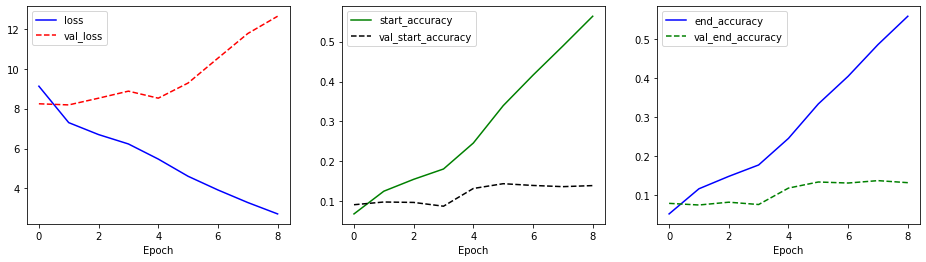

In [75]:
# training result
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['start_accuracy'], 'g-', label='start_accuracy')
plt.plot(history.history['val_start_accuracy'], 'k--', label='val_start_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['end_accuracy'], 'b-', label='end_accuracy')
plt.plot(history.history['val_end_accuracy'], 'g--', label='val_end_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

### 8.1.2 No Pretrained Model

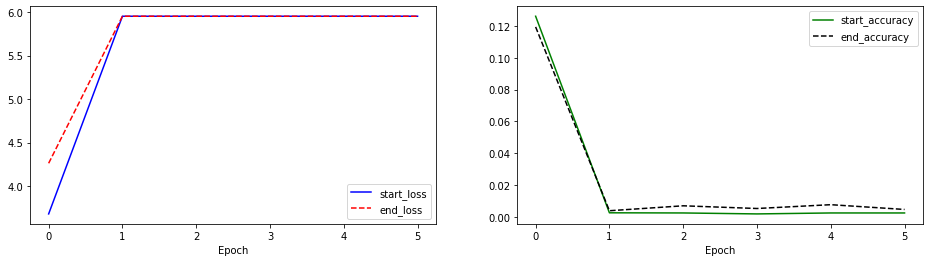

In [76]:
plt.figure(figsize=(16, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(NS_loss, 'b-', label='start_loss')
plt.plot(NE_loss, 'r--', label='end_loss')
plt.xlabel('Epoch')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(NS_acc, 'g-', label='start_accuracy')
plt.plot(NE_acc, 'k--', label='end_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

### 8.1.3 Pretrained Model

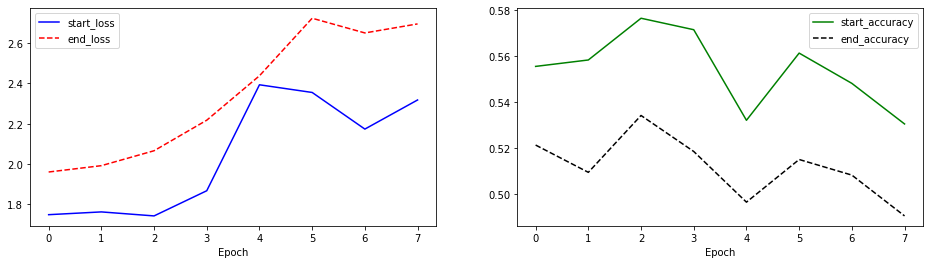

In [77]:
plt.figure(figsize=(16, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(S_loss, 'b-', label='start_loss')
plt.plot(E_loss, 'r--', label='end_loss')
plt.xlabel('Epoch')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(S_acc, 'g-', label='start_accuracy')
plt.plot(E_acc, 'k--', label='end_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

### 8.1.4 Result

#### 1) LSTM

* Validation Loss는 epoch 증가에 따라 점점 증가하는 양상을 보인다. (최고 약 12)
* Validation Accuracy의 경우 epoch 증가하더라도 0.1 ~ 0.2 정도에서 머물고 있다.

#### 2) No Pretrained Model

* Loss가 epoch가 1일 때 최고점(6.0)을 찍은 후 그 상태가 계속 유지되고 있다. 
* Accuracy의 경우 epoch가 1일 때 최저점(0.0)을 찍고 그 상태가 계속 유지되고 있다. 거의 0에 수렴하고 있다.

#### 3) Pretrained Model

* epoch가 증가함에 따라 Loss는 증가하고, Accuracy는 감소하는 양상이 보이지만,
* 수치상으로는 위 두 모델보다 확실히 더 나은 결과를 보이고 있다.
* 최저 Loss : 1.8미만, 최고 Accuracy : 약 0.57(start), 0.53(end)

### 8.2 Check the Loss

* 모델의 예측과 정답 사이의 차이는 Loss로 확인 할 수 있다.
* Loss가 크면 gradient 업데이트를 통해 학습이 진행된다.
* 첫 학습을 시작할 때는 Loss가 크게 나타나며, 학습을 진행 할 수록 점점 낮아지는 양상을 확인할 수 있다.
* Pretrained Model을 사용한다면 다른 모델(LSTM, No Pretrained Model)들보다 첫 시작 Loss가 낮을 것으로 예상된다.

### 8.2.1 LSTM

In [80]:
data = {
    "loss(LSTM)": history.history['loss'],
    "Val loss(LSTM)": history.history['val_loss']
}
df = pd.DataFrame(data)
display(df)

,loss(LSTM),Val loss(LSTM)
0,9.125311,8.243258
1,7.297892,8.187079
2,6.699219,8.524176
3,6.228963,8.877489
4,5.471931,8.524478
5,4.608126,9.284300
6,3.921856,10.531206
7,3.291384,11.766157
8,2.720341,12.633755


### 8.2.2 No Pretrained Model

In [81]:
data = {
    "Start loss(No Pretrained)": NS_loss,
    "End loss(No Pretrained)": NE_loss,
}
df = pd.DataFrame(data)
display(df)

,Start loss(No Pretrained),End loss(No Pretrained)
0,3.6820,4.2630
1,5.9506,5.9506
2,5.9506,5.9506
3,5.9506,5.9506
4,5.9506,5.9506
5,5.9506,5.9506


### 8.2.3 Pretrained Model

In [82]:
data = {
    "Start loss(Pretrained)": S_loss,
    "End loss(Pretrained)": E_loss,
}
df = pd.DataFrame(data)
display(df)

,Start loss(Pretrained),End loss(Pretrained)
0,1.7497,1.9605
1,1.7634,1.9918
2,1.7436,2.0655
3,1.8680,2.2164
4,2.3913,2.4358
5,2.3534,2.7200
6,2.1725,2.6474
7,2.3163,2.6920


### 8.2.4 Summarize Total Loss

| epoch | loss(LSTM) | Val loss(LSTM) | Start loss(No Pretrained) | End loss(No Pretrained) | Start loss(Pretrained) | End loss(Pretrained) |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 0		 | 9.1253 | 8.2433 | 3.6820 | 4.2630 | 1.7497 | 1.9605 |
| 1 | 7.2979	 | 8.1871 | 5.9506 | 5.9506 | 1.7634 | 1.9918 |
| 2 | 6.6992 | 8.5242 | 5.9506 | 5.9506 | 1.7436 | 2.0655 |
| 3 | 6.2290 | 8.8775 | 5.9506 | 5.9506 | 1.8680 | 2.2164 |
| 4 | 5.4719 | 8.5245 | 5.9506 | 5.9506 | 2.3913 | 2.4358 |
| 5 | 4.6081 | 9.2843 | 5.9506 | 5.9506 | 2.3534 | 2.7200 |
| 6 | 3.9219	 | 10.5312 | - | - | 2.1725 | 2.6474 |
| 7 | 3.2914	 | 11.7662 | - | - | 2.3163 | 2.6920 |
| 8 | 2.7203 | 12.6338 | - | - | - | - |

### 8.2.5 Conclusion

#### 1) LSTM

* LSTM의 경우 첫 Loss가 굉장히 큰 숫자에서 시작한다. 
* Validation Loss가 수렴하지 않고 점점 늘어나는 것을 확인할 수 있다.
* 학습이 제대로 진행되지 못하고 있는 것으로 생각된다.

#### 2) No Pretrained Model

* No Pretrained Model의 경우 첫 Loss가 LSTM보다는 낮게 확인되지만,
* 1 Epoch부터 Loss가 5.9506으로 확인되어 이후 Loss도 동일하게 출력된다.
* No Pretrained Model도 학습이 제대로 진행되지 못하는 것으로 판단된다. 

#### 3) Pretrained Model

* Pretrained Model의 경우 낮은 Loss 값에서 시작한다.
* 이미 학습된 모델을 가지고 추가적인 학습을 진행하는 것이라 Loss가 어느정도 증가하는 것은 예상 가능하다.
* 그러나 epoch가 진행 될 수록 점점 늘어나고 있기 때문에 하이퍼파라미터를 통해 조정이 가능할 듯하다.

### 9. Retrospection

### 9.1 What was difficult

* 데이터 전처리 부분과 전처리 이후 메모리에 로드하는 코드를 이해하는게 힘들었다.
* 아직 다 이해를 하지 못한 부분들이 있고, 클래스..다시 공부해야 할 듯하다. 😅

### 9.2 What I found out

* 공부를 할 수록개념이 제대로 잡혀있지 않으니 다른 개념들과 헷갈리기 시작했다.
* 기초적인 개념을 확실히 하고 넘어가야 겠다는 생각이 들었다.

### 9.2.1 Transfer learning

* 교사-학생간의 관계로 비유해보자면 교사는 자신이 가르치는 특정 주제에 대해 다년간의 경험을 가지고 있다.
* 이 모든 축적된 정보로 진행되는 받는 강의는 주제에 대한 간결하고 간략한 개요라고 할 수 있다. 
* 그리고 학생들이 이 강의를 듣는다는 것은 배운 사람이 초보자에게 정보를 "이전"하는 것으로 볼 수 있다.

<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2017/05/31130754/transfer-learning.jpeg' height='250' width='250'>

* 위를 염두해두고 신경망과 비교해보자면, 신경망(교사)은 데이터에 대해 훈련된다. 
* 이 네트워크는 네트워크의 "가중치"로 컴파일된 이 데이터에서 지식을 얻는다.
* 이 가중치를 추출한 다음 다른 신경망으로 전송할 수 있다. 이 다른 신경망(학생)은 처음부터 훈련하는 대신 학습된 기능을 **"전송"** 받는다.

**[전이학습의 중요성]**

* 이 또한 비유를 통해 알아본다.
* 언어가 발명되기 전에 모든 세대의 인간은 스스로 지식을 재발명해야 했으며, 이것이 한 세대에서 다른 세대로 지식 성장이 일어나는 방식이었다.
* 그렇기 때문에 현 세대에서 다음 세대로 전달되는 지식의 양이 그렇게 많지 않았다. 

<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/01081206/Knowledge-growth-graph-1b.png' height='450' width='450'>

* 그런데 언어가 발명된 이후, 같은 시간 범위에서 다음 세대로 전달된 지식의 양을 보면 엄청나게 늘어난 것을 볼 수 있다.
* 가중치 전달을 통한 전이 학습은 인간 진화에서 여러 세대에 걸쳐 지식을 전파하는 데 사용되는 언어와 동일하다고 볼 수 있다.

<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/01081354/Knowledge-growth-graph-2-1.png' height='300' width='300'>

### 9.2.2 Pretrained Model

* Pretrained Model은 간단히 말해 유사한 문제를 해결하기 위해 다른 사람이 만든 모델이며, 전이학습에서 이용되는 학습된 신경망을 뜻한다.
* 유사한 문제를 해결하기 위해 처음부터 모델을 구축하는 대신 다른 문제에 대해 학습된 모델(Pretrained Model)을 출발점으로 사용한다.
* Self learning car를 만들고자 하는 경우를 예를 들어보면, 
* 처음부터 괜찮은 이미지 인식 알고리즘을 구축하는 데 몇 년을 보내거나 
* ImageNet 데이터를 기반으로 구축된 Google의 inception model(Pretrained Model)을 사용하여 해당 사진에서 이미지를 식별할 수 있다.
* Pretrained Model은 응용 프로그램에서 100% 정확하지 않을 수 있지만, 발명하는 데 필요한 막대한 노력을 절약할 수 있다.

### 9.2.3 Fine-Tuning

#### 1) What is Fine-Tuning?

* Fine-Tuning이란 기존에 학습되어져 있는 모델(Pretrained Model)을 기반으로 아키텍쳐를 새로운 목적에 맞게 변형하고 **이미 학습된 모델의 가중치**를 **미세하게 조정**하여 학습시키는 방법을 말한다.
* Fine-Tuning을 진행할 때, 완전히 랜덤한 초기 파라미터를 사용하거나, 가장 아래쪽의 레이어(일반적인 피쳐를 학습한 덜추상화된 레이어)의 파라미터를 학습하게 되면 Overfitting이 발생하거나 전체 파라미터가 망가질 수 있기 때문에 주의해야 한다.
* 따라서, Fine-Tuning은 **정교하게** 진행해야 한다.

* 고양이와 개 분류기를 만드는데 다른 데이터로 학습된 모델(VGG16, ResNet 등)을 가져다 쓰는 경우를 생각해보자.
* VGG16 모델의 경우 1000 개의 카테고리를 학습시켰기 때문에 고양이와 개, 2개의 카테고리만 필요한 문제를 해결하는데 모든 레이어를 그대로 쓸 수는 없다.
* 따라서 가장 쉽게 이용하려면 내 데이터를 해당 모델로 예측(predict)하여 **\*보틀넥 피쳐**만 뽑아내고, 이를 이용하여 어파인 레이어(Fully-connected layer)만 학습시켜서 사용하는 방법을 취하게 된다.
* 하지만 이 경우는 파인튜닝이라고 부르지 않는다. 
* 피쳐를 추출해내는 레이어의 파라미터를 업데이트 하지 않기 때문이다.
* 어파인 레이어를 업데이트 하지 않냐고 생각할 수 있지만 내가 새로 구성한 레이어이기 때문에 업데이트가 아니며 초기 웨이트가 랜덤이기 때문에 정교하지도 않다.
* 파인튜닝을 했다고 말하려면 기존에 학습이 된 레이어에 내 데이터를 추가로 학습시켜 파라미터를 업데이트 해야 한다.

#### 2) Ways to Fine-Tuning

* 데이터 크기와 유사성을 고려해서 각 상황에 따라 구체적으로 어떻게 Fine-tuning을 진행해야 하는지 결정한다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FxjNT2%2FbtqvC7gR5Vw%2FWW1IlF9M9DTCypyNTeC2Wk%2Fimg.png' height='650' width='650'>

**\* 보틀넥 피쳐(Bottleneck feature)**
* 가장 마지막 CNN 블록, 즉 Fully-connected layer(Affine layer 또는 Dense layer 라고도 부름) 직전의 CNN 블록의 결과.
* CNN 모델은 각 CNN 블록의 풀링(pooling) 레이어를 지나면서 피쳐 사이즈가 줄어들기(추상화되기) 때문에 피쳐 크기를 기준으로 생각하면 병을 뒤집어둔 모양과 비슷하다.

<img src='https://blog.keras.io/img/imgclf/vgg16_original.png' height='300' width='300'>

### 9.3 What I want to know more about

* Pretrained Model을 가져와서 추가적으로 학습시켜 사용해보긴 했지만, 위에서처럼 파라미터를 조정해보거나 하진 않았다.
* 이 부분은 다양한 경험이 필요한 부분인 것 같기도 하다.
* 파라미터 조정까지 고려해준다면 더 나은 loss, accuracy를 확인 할 수 있을 것 같다.

### 9.4 Self-Resolution

* 아는 만큼 보이고, 보이는 만큼 이해한다.
* 방학동안 복습 및 위 내용 블로그에 정리하기

**[Reference]**

* BERT
  * https://wikidocs.net/115055
  * https://paul-hyun.github.io/bert-01/
  * https://arxiv.org/abs/1810.04805
  * https://towardsml.wordpress.com/2019/09/17/bert-explained-a-complete-guide-with-theory-and-tutorial/
* 전이학습
  * https://www.analyticsvidhya.com/blog/2017/06/transfer-learning-the-art-of-fine-tuning-a-pre-trained-model/
* Fine-tuning
  * https://jeinalog.tistory.com/13